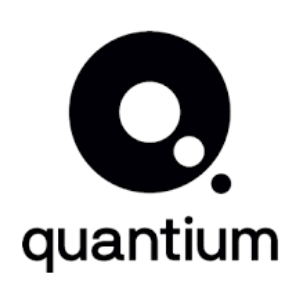
## Customer Value Segmentation for Chip Category Strategy

Following your initial data cleaning and EDA, Quantium's retail analytics team requires a deeper understanding of customer value segments. You will implement RFM (Recency, Frequency, Monetary) analysis on the chip category transaction data to identify high-value customer segments and develop targeted retention strategies. Your segmentation model will directly inform Julia's customer engagement initiatives and promotional planning for the next quarter.

**Business Context:** The supermarket has identified that customer retention costs 5x less than acquisition. Julia needs to know which customers are most valuable, which are at risk of churning, and how to allocate the limited marketing budget effectively. Your RFM analysis will enable personalized marketing campaigns and optimize resource allocation.


## 1. Setup and Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
!pip install squarify

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analyst Thực Chiến/cleaned_data.csv')

In [ ]:
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE_SIZE,CLEAN_PROD_NAME,BRAND,PRICE_PER_UNIT,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural Chip Compny SeaSalt,Natural Chip Co.,3.00,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs Nacho Cheese,CCs,2.10,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths Crinkle Cut Chips Chicken,Smiths,1.45,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths Chip Thinly S/Cream&Onion,Smiths,3.00,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle Tortilla ChpsHny&Jlpno Chili,Kettle,4.60,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242123,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle Sweet Chilli And Sour Cream,Kettle,5.40,YOUNG SINGLES/COUPLES,Premium
242124,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos Splash Of Lime,Tostitos,4.40,YOUNG SINGLES/COUPLES,Premium
242125,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos Mexicana,Doritos,4.40,YOUNG SINGLES/COUPLES,Premium
242126,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos Corn Chip Mexican Jalapeno,Doritos,3.90,YOUNG SINGLES/COUPLES,Premium


## 2. Data Exploration and Validation

Make sure to use your clean data from Homework 2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242128 entries, 0 to 242127
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              242128 non-null  int64  
 1   STORE_NBR         242128 non-null  int64  
 2   LYLTY_CARD_NBR    242128 non-null  int64  
 3   TXN_ID            242128 non-null  int64  
 4   PROD_NBR          242128 non-null  int64  
 5   PROD_NAME         242128 non-null  object 
 6   PROD_QTY          242128 non-null  int64  
 7   TOT_SALES         242128 non-null  float64
 8   PACKAGE_SIZE      242128 non-null  object 
 9   CLEAN_PROD_NAME   242128 non-null  object 
 10  BRAND             242128 non-null  object 
 11  PRICE_PER_UNIT    242128 non-null  float64
 12  LIFESTAGE         242128 non-null  object 
 13  PREMIUM_CUSTOMER  242128 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 25.9+ MB


## 3. RFM Metrics Calculation


### 3.1 Calculate Base RFM Values

In [ ]:
import xlrd

In [ ]:
data['DATE'] = data['DATE'].apply(lambda x: xlrd.xldate_as_datetime(x, 0))

In [ ]:
rfm_data = data.groupby('LYLTY_CARD_NBR').agg({
    'DATE': lambda x: (pd.to_datetime('2019-07-01') - x.max()).days,
    'TXN_ID': 'count',
    'TOT_SALES': 'sum'
})

In [ ]:
rfm_data.rename(columns={'DATE': 'Recency',
                         'TXN_ID': 'Frequency',
                         'TOT_SALES': 'Monetary'}, inplace=True)

### 3.2. RFM Value Distribution Analysis

*   Visualize distribution of R, F, and M values
*   Identify outliers and handle appropriately
*   Check for any calculation anomalies

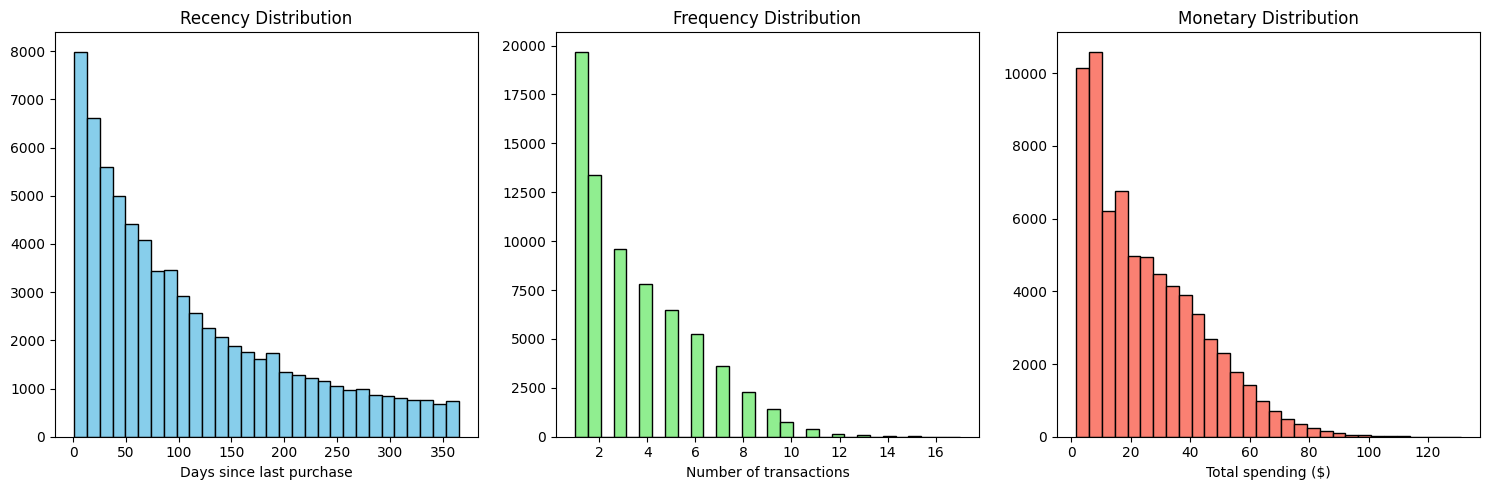

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(rfm_data['Recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days since last purchase')

axes[1].hist(rfm_data['Frequency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of transactions')

axes[2].hist(rfm_data['Monetary'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total spending ($)')

plt.tight_layout()
plt.savefig('rfm_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Remove outliers (Monetary) based on percentiles
percentile_99 = rfm_data['Monetary'].quantile(0.99)

rfm_data = rfm_data[rfm_data['Monetary'] <= percentile_99].copy()

In [ ]:
print(f"RFM metrics calculated for {len(rfm_data):,} customers")

RFM metrics calculated for 70,217 customers


## 4. RFM Scoring Implementation


### 4.1. Create Quartile-Based Scores
* Calculate quartiles for each RFM dimension
* Assign scores 1-4 (4 being best)
* Create R_score, F_score, M_score columns


In [ ]:
rfm_data['Recency_score'] = pd.qcut(rfm_data['Recency'], q=4, labels=[4, 3, 2, 1], duplicates='drop')
rfm_data['Frequency_score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])
rfm_data['Monetary_score'] = pd.qcut(rfm_data['Monetary'], q=4, labels=[1, 2, 3, 4], duplicates='drop')

rfm_data['Recency_score'] = rfm_data['Recency_score'].astype(int)
rfm_data['Frequency_score'] = rfm_data['Frequency_score'].astype(int)
rfm_data['Monetary_score'] = rfm_data['Monetary_score'].astype(int)

### 4.2. Calculate Combined RFM Score
* Implement formula: RFM_Score = R × 100 + F × 10 + M
* Validate score ranges (111 to 444)
* Add RFM_score column to dataset


In [ ]:
rfm_data['RFM_Score'] = rfm_data['Recency_score'].astype(float) * 100 + rfm_data['Frequency_score'].astype(float) * 10 + rfm_data['Monetary_score'].astype(float)

In [ ]:
rfm_data['RFM_Score'] = rfm_data['RFM_Score'].astype(int).astype(str)

## 5. Customer Segmentation


In [ ]:
def segment_name(row):
    if row['Recency_score'] >= 4 and row['Frequency_score'] >= 4 and row['Monetary_score'] >= 4:
        return 'Champions'
    elif row['Recency_score'] >= 3 and row['Frequency_score'] >= 3 and row['Monetary_score'] >= 3:
        return 'Loyal Customers'
    elif row['Recency_score'] >= 3 and row['Frequency_score'] <= 2 and row['Monetary_score'] <= 2:
        return 'New Customers'
    elif row['Recency_score'] <= 2 and row['Frequency_score'] >= 3 and row['Monetary_score'] >= 3:
        return 'At Risk'
    elif row['Recency_score'] <= 2 and row['Frequency_score'] <= 2 and row['Monetary_score'] >= 3:
        return "Can't Lose Them"
    elif row['Recency_score'] >= 3 and row['Monetary_score'] <= 2:
        return 'Promising'
    elif row['Recency_score'] <= 2 and row['Frequency_score'] <= 2 and row['Monetary_score'] <= 2:
        return 'Lost'
    else:
        return 'Need Attention'

In [ ]:
rfm_data['Segment'] = rfm_data.apply(segment_name, axis = 1)

In [ ]:
rfm_data[rfm_data['Segment'] == "Need Attention"]

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_Score,Segment
LYLTY_CARD_NBR,,,,,,,,
1291,260,4,10.4,1,3,2,132,Need Attention
1411,119,4,14.5,2,3,2,232,Need Attention
1459,2,3,22.2,4,2,3,423,Need Attention
2084,248,4,14.7,1,3,2,132,Need Attention
2311,161,5,19.3,2,3,2,232,Need Attention
...,...,...,...,...,...,...,...,...
272267,76,2,21.0,3,2,3,323,Need Attention
272309,59,2,20.2,3,2,3,323,Need Attention
272323,208,3,18.8,1,3,2,132,Need Attention


## 6. Segment Performance Analysis

### 6.1 Segment Size and Value


In [ ]:
rfm_data.reset_index(inplace=True)

In [ ]:
segment_summary = rfm_data.groupby('Segment').agg({
    'LYLTY_CARD_NBR': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['sum', 'mean']
}).round(2)

segment_summary.columns = ['Customers', 'Avg_Recency', 'Avg_Frequency', 'Total_Revenue', 'Avg_Revenue']
segment_summary['Customer_%'] = (segment_summary['Customers'] / segment_summary['Customers'].sum() * 100).round(1)
segment_summary['Revenue_%'] = (segment_summary['Total_Revenue'] / segment_summary['Total_Revenue'].sum() * 100).round(1)

print("\nSEGMENT SUMMARY:")
print(segment_summary.sort_values('Total_Revenue', ascending=False))


SEGMENT SUMMARY:
                 Customers  Avg_Recency  Avg_Frequency  Total_Revenue  \
Segment                                                                 
Loyal Customers      16065        41.47           4.98      599895.25   
Champions             7090        15.59           7.10      373948.95   
At Risk               9491       135.36           4.60      337742.25   
Lost                 23031       206.97           1.35      205461.65   
New Customers         9706        39.90           1.58       99768.85   
Need Attention        2243        93.53           2.87       45256.25   
Can't Lose Them       1222       166.66           2.49       28896.45   
Promising             1369        37.13           3.18       22129.50   

                 Avg_Revenue  Customer_%  Revenue_%  
Segment                                              
Loyal Customers        37.34        22.9       35.0  
Champions              52.74        10.1       21.8  
At Risk                35.59       

In [ ]:
segment_summary = segment_summary.sort_values('Total_Revenue', ascending=False)

In [ ]:
segment_summary

,Customers,Avg_Recency,Avg_Frequency,Total_Revenue,Avg_Revenue,Customer_%,Revenue_%
Segment,,,,,,,
Loyal Customers,16065,41.47,4.98,599895.25,37.34,22.9,35.0
Champions,7090,15.59,7.10,373948.95,52.74,10.1,21.8
At Risk,9491,135.36,4.60,337742.25,35.59,13.5,19.7
Lost,23031,206.97,1.35,205461.65,8.92,32.8,12.0
New Customers,9706,39.90,1.58,99768.85,10.28,13.8,5.8
Need Attention,2243,93.53,2.87,45256.25,20.18,3.2,2.6
Can't Lose Them,1222,166.66,2.49,28896.45,23.65,1.7,1.7
Promising,1369,37.13,3.18,22129.50,16.16,1.9,1.3


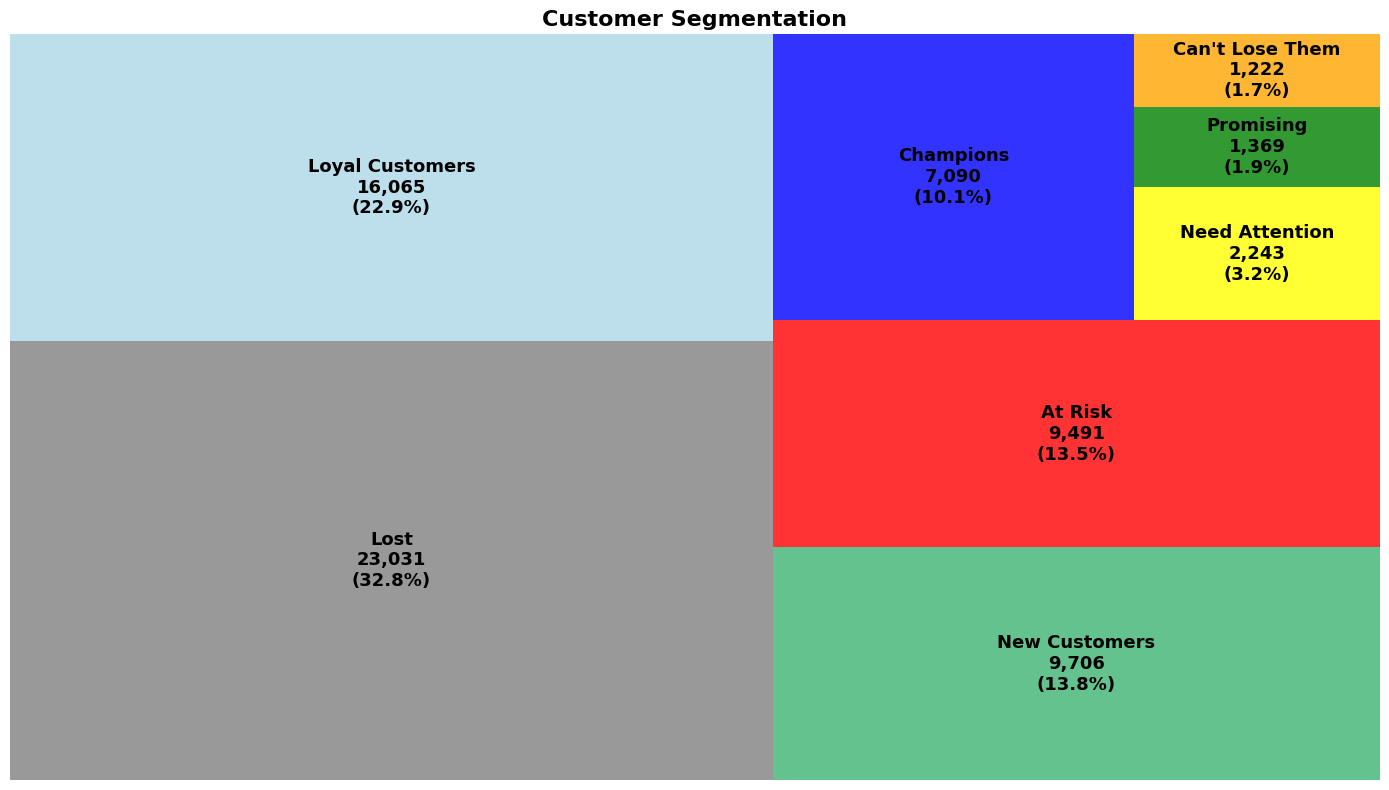

In [ ]:
import squarify
segment_counts = rfm_data['Segment'].value_counts().to_dict()

total = sum(segment_counts.values())
labels = [f'{k}\n{v:,}\n({v/total*100:.1f}%)' for k, v in segment_counts.items()]


colors = [
    'grey', 'lightblue', 'mediumseagreen', 'red', 'blue',
    'yellow', 'green', 'orange'
]

plt.figure(figsize=(14, 8))
squarify.plot(sizes=list(segment_counts.values()),
              label=labels,
              color=colors,
              alpha=0.8,
              text_kwargs={'fontsize': 13, 'weight': 'bold'})

plt.axis('off')
plt.title('Customer Segmentation', fontsize=16, weight = 'bold')
plt.tight_layout()
plt.show()

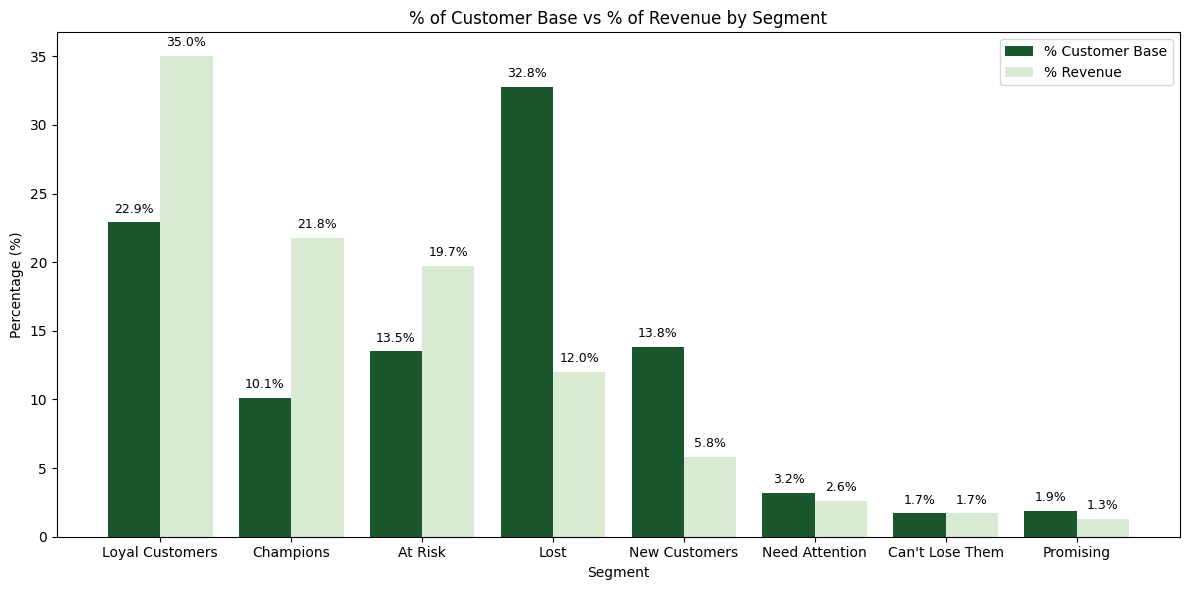

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(segment_summary))
width = 0.4

bars1 = ax.bar([i - width/2 for i in x], segment_summary['Customer_%'], width=width, label='% Customer Base', color = "#1a572cff")
bars2 = ax.bar([i + width/2 for i in x], segment_summary['Revenue_%'], width=width, label='% Revenue', color = "#d9ead3ff")

for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

ax.set_title('% of Customer Base vs % of Revenue by Segment')
ax.set_xlabel('Segment')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(x)
ax.set_xticklabels(segment_summary.index, rotation=0)
ax.legend()

plt.tight_layout()
plt.show()

- Nearly a third (32.8%) of the total number of customers are classified as Churn/ Lost during the surveyed period, making Lost the biggest segment of all. Having said that, this group only contributes 12% to the Total Revenue, suggesting that it may represent customers who just made purchases every now and then with little commitment and bulk-buying.
- Conversely, Loyal Customers only makes up for about 23% of the toal number of customers but their total spend accounts for up to 35%, making it the most valuable segment in terms of volume and spend.
- Despite having a small population of around 7K, Champions contributes more than a fifth of the total revenue. This is followed by that of At Risk, which makes up for 13.5% of the total customers and 19.7% of the toal revenue.
- New Customers, which comprises around 14% of the total customers is a profitable segment to exploit more as its revenue only takes up 6% now.
- Need Attention, Can't Lose Them and Promising are all minor segments with relatively small populations and revenues, ranging from 1.7% to 3.2% and 1.3% to 2.6% respectively.

In [ ]:
segment_summary

,Customers,Avg_Recency,Avg_Frequency,Total_Revenue,Avg_Revenue,Customer_%,Revenue_%
Segment,,,,,,,
Loyal Customers,16065,41.47,4.98,599895.25,37.34,22.9,35.0
Champions,7090,15.59,7.10,373948.95,52.74,10.1,21.8
At Risk,9491,135.36,4.60,337742.25,35.59,13.5,19.7
Lost,23031,206.97,1.35,205461.65,8.92,32.8,12.0
New Customers,9706,39.90,1.58,99768.85,10.28,13.8,5.8
Need Attention,2243,93.53,2.87,45256.25,20.18,3.2,2.6
Can't Lose Them,1222,166.66,2.49,28896.45,23.65,1.7,1.7
Promising,1369,37.13,3.18,22129.50,16.16,1.9,1.3


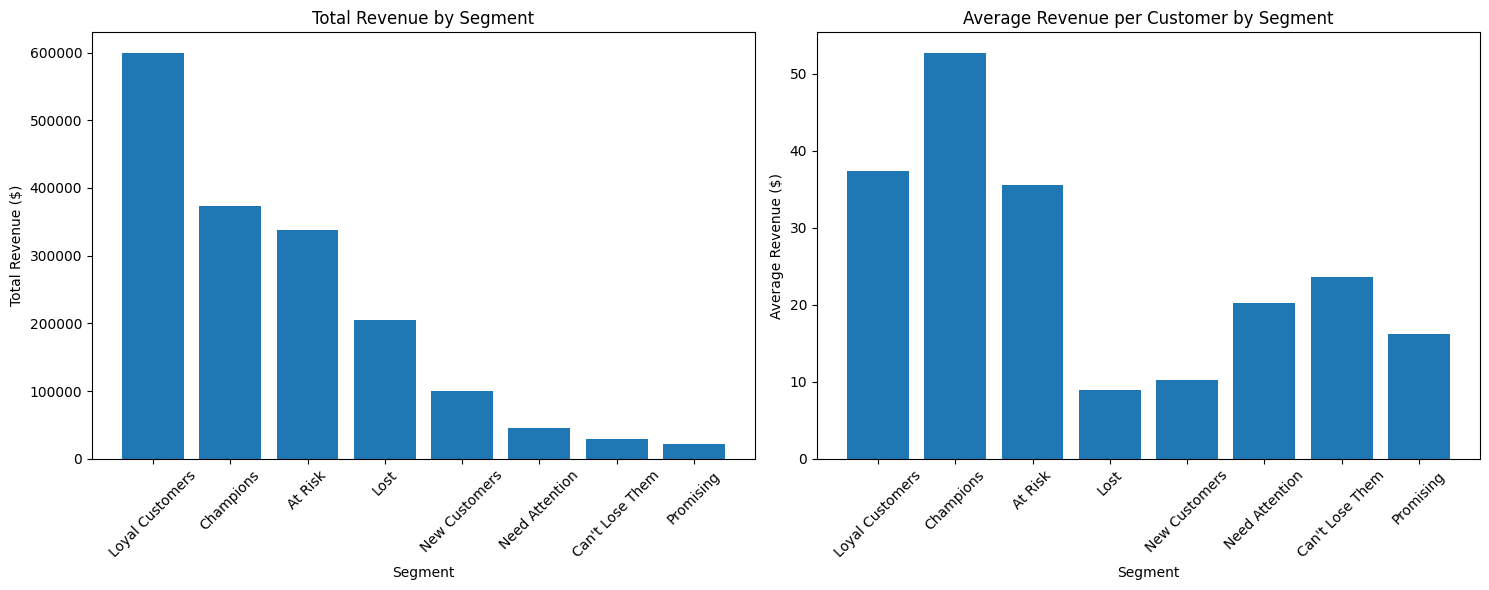

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

segment_revenue = segment_summary.sort_values('Total_Revenue', ascending=False)
ax1.bar(segment_revenue.index, segment_revenue['Total_Revenue'])
ax1.set_title('Total Revenue by Segment')
ax1.set_xlabel('Segment')
ax1.set_ylabel('Total Revenue ($)')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(segment_revenue.index, segment_revenue['Avg_Revenue'])
ax2.set_title('Average Revenue per Customer by Segment')
ax2.set_xlabel('Segment')
ax2.set_ylabel('Average Revenue ($)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('segment_value_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


Loyal Customers produce the largest Total Revenue of nearly 600K, but average revenue per customer lies at around 37. This number is far surpassed by that of Champions, whose Total Revenue contribution ranks second with nearly 374K, by a gap of 15. Churn segments (At Risk and Lost) surprisingly have great Total Revenue of around 338K and 206K respectively. While At risk customers on average spent nearly 36, Lost customers only spent about 9, which further indicates their short customer journey and low commitment.

New Customers, Need Attention, Can't Lose Them and Promising segments all have their Total Revenues hover around 2K and well-over 10K. Among these segments, Can'T lose customers contribute the highest average revenue of nearly 25, suggesting that this segment should be focused more and need special offers and campaigns to retain these profitable customers. The other three segments also have good average revenues per customer, ranging between 10 and 20.

### 6.2 Segment Demographics Integration
* Merge RFM segments with customer demographics
* Analyze LIFESTAGE distribution within each segment
* Analyze PREMIUM_CUSTOMER distribution within each segment
* Create cross-tabulation tables
* Identify demographic patterns (e.g., Champions are mostly Premium customers)


In [ ]:
customer_demographics = data[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates(subset=['LYLTY_CARD_NBR']).set_index('LYLTY_CARD_NBR')
rfm_data = rfm_data.merge(customer_demographics, on='LYLTY_CARD_NBR', how='left')

In [ ]:
lifestage_ct = pd.crosstab(rfm_data['Segment'], rfm_data['LIFESTAGE'])
lifestage_ct.style.background_gradient(cmap = 'Blues').set_caption("LIFESTAGE Distribution by Segment")

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
Segment,,,,,,,
At Risk,990,279,1278,2383,2230,1073,1258
Can't Lose Them,138,55,133,226,249,138,283
Champions,581,86,1907,1323,953,1703,537
Lost,2328,992,2321,3946,4597,2392,6455
Loyal Customers,1652,488,2288,3920,3717,2187,1813
Need Attention,244,86,232,439,486,211,545
New Customers,985,431,1021,1710,1919,953,2687
Promising,138,64,144,269,291,140,323


In [ ]:
lifestage_analysis = pd.crosstab(rfm_data['Segment'],
                                rfm_data['LIFESTAGE'],
                                normalize='index') * 100

print("TOP LIFESTAGE BY SEGMENT:")
for segment in lifestage_analysis.index:
    top_lifestage = lifestage_analysis.loc[segment].idxmax()
    percentage = lifestage_analysis.loc[segment, top_lifestage]
    print(f"{segment}: {top_lifestage} ({percentage:.2f}%)")

TOP LIFESTAGE BY SEGMENT:
At Risk: OLDER SINGLES/COUPLES (25.11%)
Can't Lose Them: YOUNG SINGLES/COUPLES (23.16%)
Champions: OLDER FAMILIES (26.90%)
Lost: YOUNG SINGLES/COUPLES (28.03%)
Loyal Customers: OLDER SINGLES/COUPLES (24.40%)
Need Attention: YOUNG SINGLES/COUPLES (24.30%)
New Customers: YOUNG SINGLES/COUPLES (27.68%)
Promising: YOUNG SINGLES/COUPLES (23.59%)


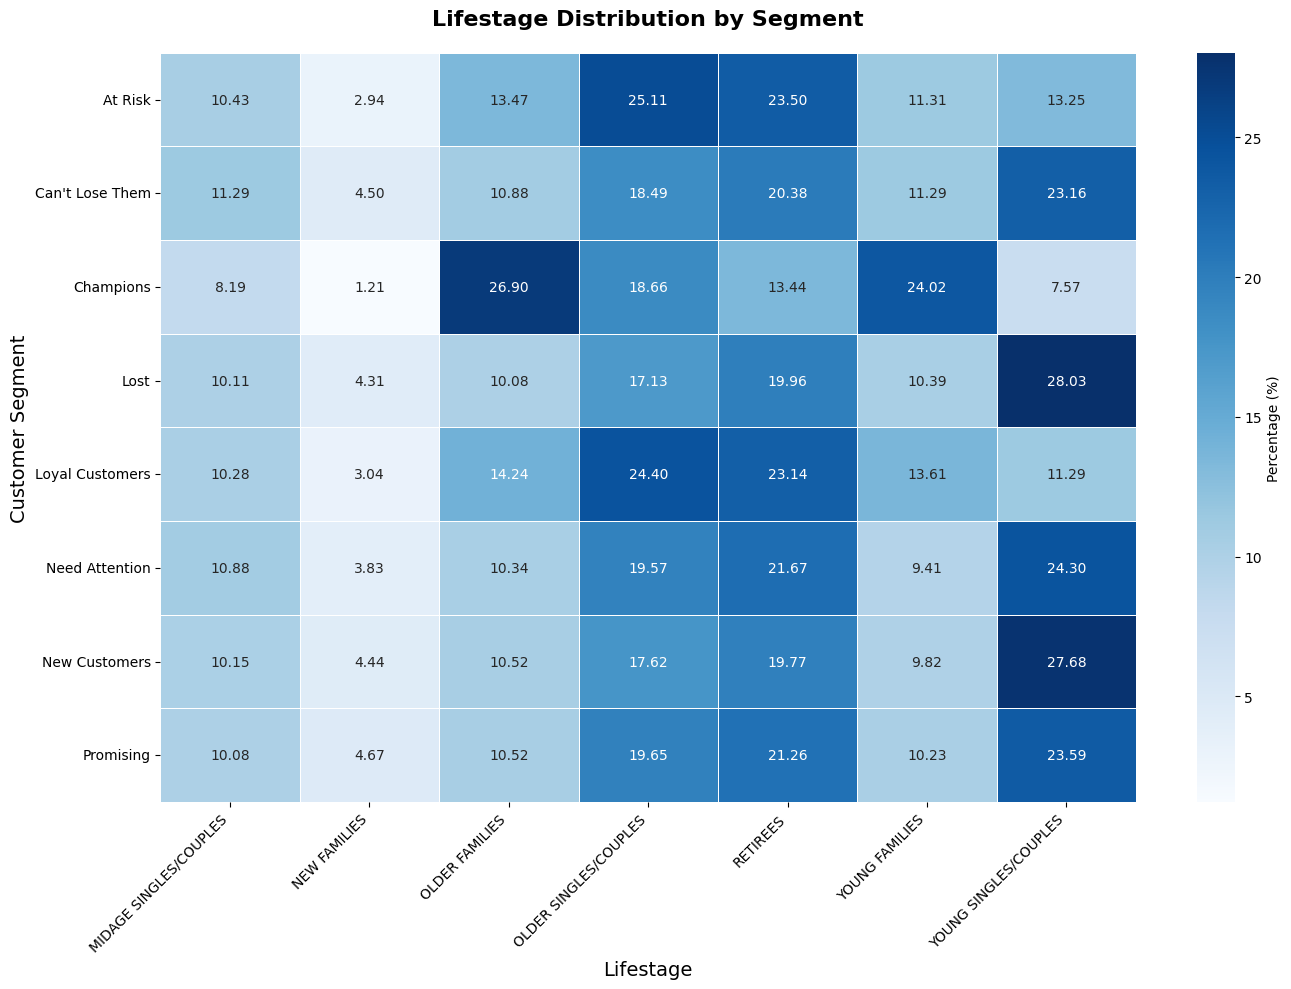

In [ ]:
plt.figure(figsize=(14, 10))
lifestage_pct = pd.crosstab(rfm_data['Segment'], rfm_data['LIFESTAGE'], normalize='index') * 100
sns.heatmap(lifestage_pct,
            annot=True,
            fmt='.2f',
            cmap='Blues',
            cbar_kws={'label': 'Percentage (%)'},
            linewidths=0.5)

plt.title('Lifestage Distribution by Segment', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Lifestage', fontsize=14)
plt.ylabel('Customer Segment', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Champions are heavily dominated by Older Families (26.90%) and Young Families (24.02%)
→ Indicates high-value customers tend to be family-oriented.

- Can't Lose Them segment shows strong presence of Midage Singles/Couples (11.29%) and Young Singles/Couples (23.16%)
→ Suggests younger/mid-aged singles may be churning but still valuable.

- Lost segment is led by Young Singles/Couples (28.03%) and Older Singles/Couples (17.13%)
→ These groups may need better retention strategies or relevance.

- At Risk segment is composed of Older Singles/Couples (25.11%) and Retirees (23.50%)
→ Indicates disengagement is strong among the elderly.

- Loyal Customers are concentrated in Older Singles/Couples (24.40%) and Retirees (23.14%)
→ Seniors are still actively engaged but may need personalised offers.

- Need Attention customers are mostly Young Singles/Couples (24.30%) and Retirees (21.67%)
→ Both ends of the age spectrum need re-engagement strategies.

- New Customers are mostly Young Singles/Couples (27.68%) and Older Singles/Couples (17.62%)
→ Suggests initial traction among singles – potential to grow loyalty.

- Promising customers include Young Singles/Couples (23.59%), Retirees (21.26%), and Older Singles/Couples (19.65%)
→ Early-stage value showing across various older demographics.

In [ ]:
premium_ct = pd.crosstab(rfm_data['Segment'], rfm_data['PREMIUM_CUSTOMER'])
premium_ct.style.background_gradient(cmap = 'Greens').set_caption("PREMIUM_CUSTOMER Distribution by Segment")

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
Segment,,,
At Risk,3159,3807,2525
Can't Lose Them,396,533,293
Champions,2683,2564,1843
Lost,7513,9716,5802
Loyal Customers,5509,6245,4311
Need Attention,676,965,602
New Customers,3163,3984,2559
Promising,475,547,347


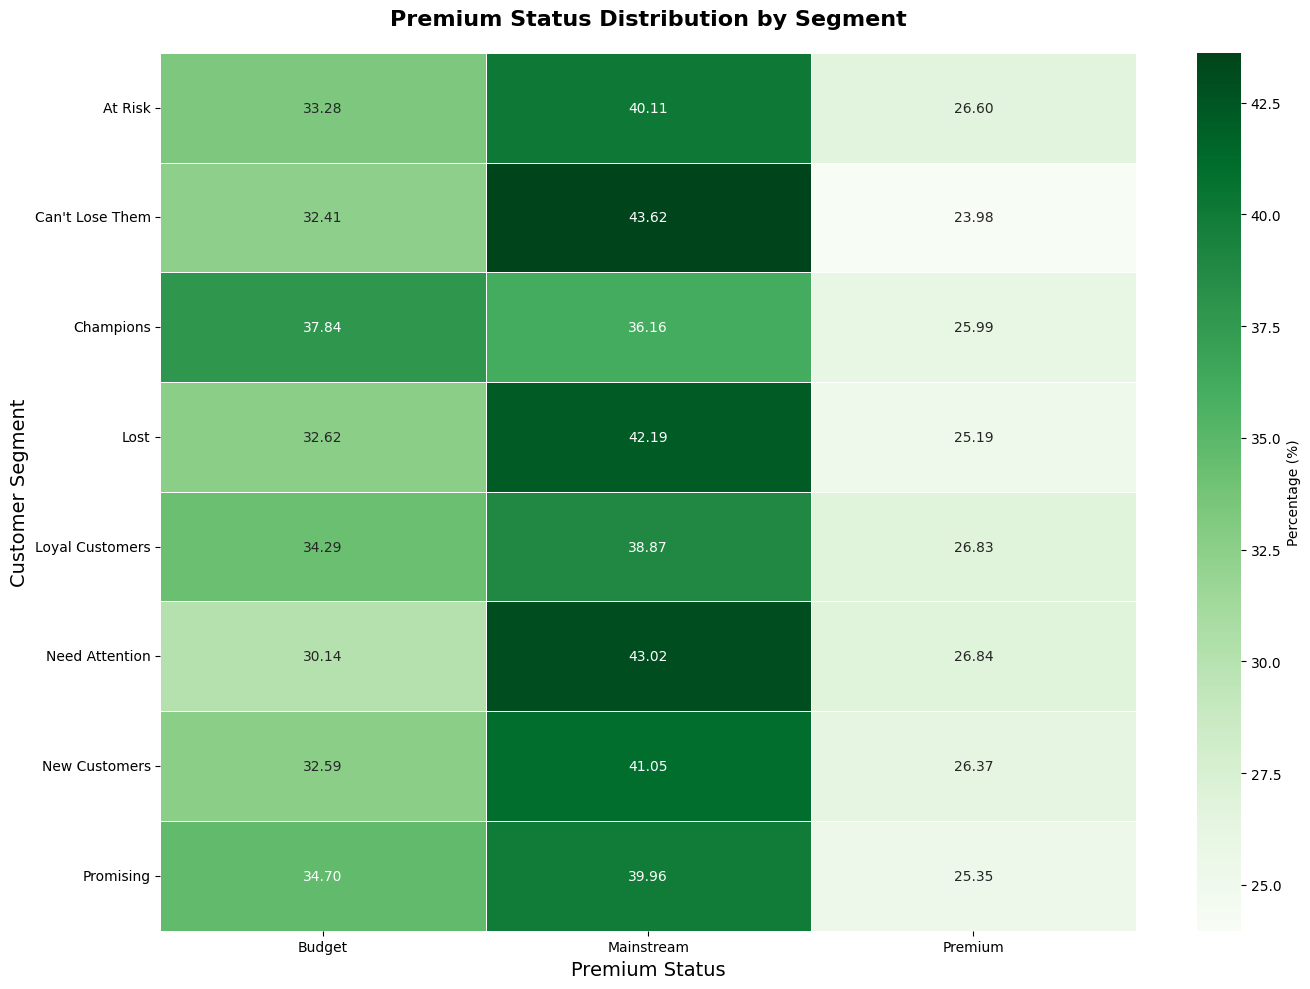

In [ ]:
plt.figure(figsize=(14, 10))
premium_pct = pd.crosstab(rfm_data['Segment'], rfm_data['PREMIUM_CUSTOMER'], normalize = 'index') * 100
sns.heatmap(premium_pct,
            annot=True,
            fmt='.2f',
            cmap='Greens',
            cbar_kws={'label': 'Percentage (%)'},
            linewidths=0.5)

plt.title('Premium Status Distribution by Segment', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Premium Status', fontsize=14)
plt.ylabel('Customer Segment', fontsize=14)
plt.tight_layout()
plt.show()

- Champions are dominated by Budget customers (37.84%), with only ~26% Premium
→ This is counterintuitive — your top spenders are not premium-tier shoppers, suggesting either:
    • Budget shoppers drive high volume through frequent purchases
    • The Premium tier does not align with actual high-value behaviour
→ Consider redefining Premium criteria or creating a behaviour-based loyalty tier.

- Mainstream customers are overrepresented in churn-risk segments
→ Can't Lose Them (43.62%), Need Attention (43.02%), Lost (42.19%)
→ Indicates mid-tier fatigue: these customers may not feel differentiation or loyalty benefits
→ Suggests a gap in mid-tier engagement or perceived value — promotional fatigue, commoditisation?

- Premium customers are not prioritised or protected
→ Premium share is lowest or stagnant across segments — even in Can't Lose Them (23.98%)
→ Surprisingly, New Customers (26.37%) have a higher Premium share than Champions
→ Implies the business may attract high-value shoppers initially but fail to retain them over time

- oyal and Need Attention segments have a similar Premium share (~26.8%)
→ Suggests no clear strategy exists to move Premium customers from attention to loyalty
→ Retention mechanisms may be too generic — lacking exclusivity or customisation for top tiers

- Promising and At Risk segments hover around 25% Premium
→ These are pivotal segments where Premium-specific reactivation strategies (e.g. tailored offers, early access) could yield high ROI
→ Risk of ignoring them means losing potential future Champions

## 7. Product Affinity Analysis


### 7.1 Top Products by Segment



In [ ]:
data = data.merge(rfm_data[['LYLTY_CARD_NBR', 'Segment']], on = 'LYLTY_CARD_NBR', how = 'left')

In [ ]:
data.groupby('Segment')['LYLTY_CARD_NBR'].nunique()

,LYLTY_CARD_NBR
Segment,
At Risk,9491
Can't Lose Them,1222
Champions,7090
Lost,23031
Loyal Customers,16065
Need Attention,2243
New Customers,9706
Promising,1369


In [ ]:
top_products_by_segment = data.groupby(['Segment', 'CLEAN_PROD_NAME'])['PROD_QTY'].sum().reset_index()
top_products_by_segment = top_products_by_segment.loc[top_products_by_segment.groupby('Segment')['PROD_QTY'].idxmax()]
top_products_by_segment

,Segment,CLEAN_PROD_NAME,PROD_QTY
30,At Risk,Kettle Mozzarella Basil & Pesto,1360
114,Can't Lose Them,Dorito Corn Chp Supreme,379
276,Champions,Smiths Crinkle Chips Salt & Vinegar,1307
354,Lost,Pringles Barbeque,842
420,Loyal Customers,Cobs Popd Sea Salt Chips,2198
526,Need Attention,Dorito Corn Chp Supreme,279
631,New Customers,Doritos Corn Chip Mexican Jalapeno,445
728,Promising,Cheezels Cheese Box,130


### 7.2 Brand Preference Index
* Calculate: (Segment brand purchase % / Overall brand purchase %)
* Index > 1 means segment over-indexes on that brand
* Create heatmap or any effective visualisation types of brand preferences by segment


In [ ]:
overall_brand_purchase = data.groupby('BRAND')['PROD_QTY'].sum().reset_index(name = 'Overall_Brand_Quantity')
overall_brand_purchase['Overall_Brand_Percent'] = overall_brand_purchase['Overall_Brand_Quantity'] / data['PROD_QTY'].sum()

In [ ]:
segment_brand_counts = data.groupby(['Segment', 'BRAND'])['PROD_QTY'].sum().reset_index(name = 'Segment_Quantity')
segment_brand_purchase = segment_brand_counts.groupby(['Segment', 'BRAND'])['Segment_Quantity'].sum().reset_index(name = 'Segment_Brand_Quantity')
total_segment_purchases = data.groupby('Segment')['PROD_QTY'].sum().reset_index(name = 'Total_Segment_Quantity')
segment_brand_purchase = segment_brand_purchase.merge(total_segment_purchases, on = 'Segment', how = 'left')

In [ ]:
segment_brand_purchase['Segment_Brand_Percent'] = segment_brand_purchase['Segment_Brand_Quantity'] / segment_brand_purchase['Total_Segment_Quantity']

brand_preference_index = segment_brand_purchase.merge(overall_brand_purchase[['BRAND', 'Overall_Brand_Percent']], on = 'BRAND', how = 'left')

brand_preference_index['Preference_Index'] = brand_preference_index['Segment_Brand_Percent'] / brand_preference_index['Overall_Brand_Percent']

In [ ]:
brand_preference_index['Preference_Index'] = round(brand_preference_index['Preference_Index'], 2)

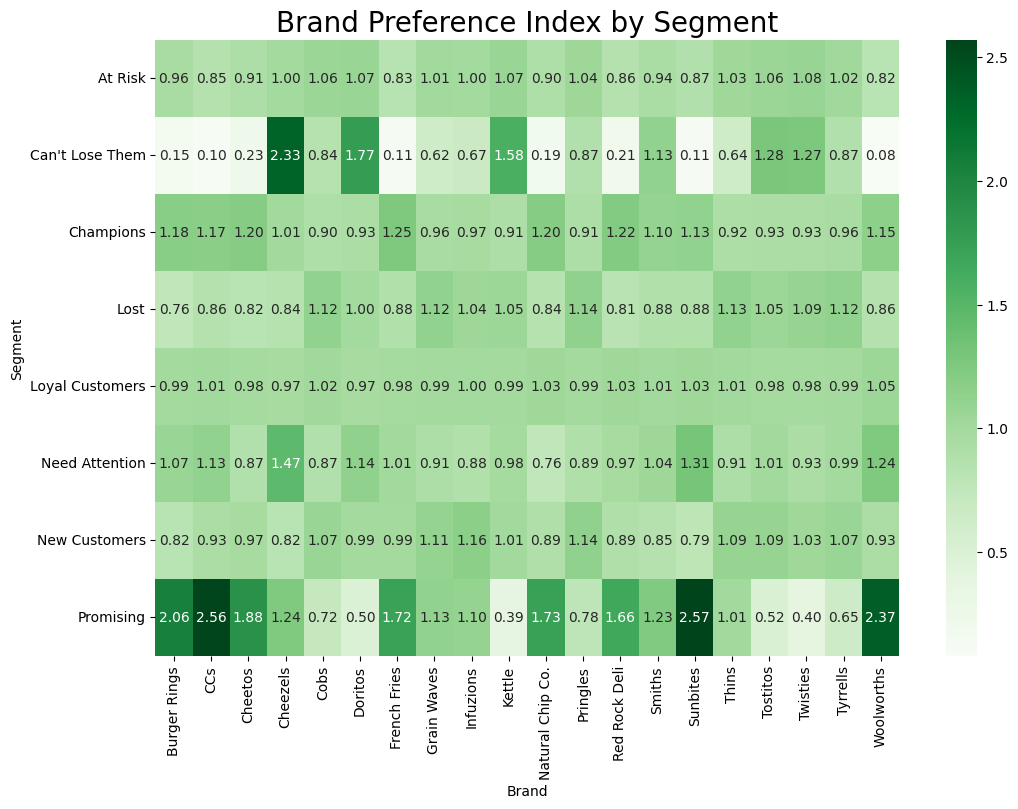

In [ ]:
heatmap_data = brand_preference_index.pivot(index = 'Segment', columns = 'BRAND', values = 'Preference_Index').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot = True, fmt = ".2f", cmap = "Greens")
plt.title('Brand Preference Index by Segment', size = 20)
plt.xlabel('Brand')
plt.ylabel('Segment')
plt.xticks(rotation = 90)
plt.show()

- Promising customers exhibit extremely strong brand polarisation
→ Standout brand preferences: Burger Rings (2.06), CCs (2.56), Cheetos (1.88), Sunbites (2.57), Woolworths (2.37)
→ These values are 2–3× the baseline, suggesting early-stage loyalty or experimentation with distinctive brands
→ Opportunity: Nurture brand loyalty in this segment via targeted promotions, samplers or bundles

- Can't Lose Them segment shows sharp spikes in brand preference
→ High indices for Cheezels (2.33), Doritos (1.77), and Kettle (1.58)
→ These values suggest strong brand-specific loyalty within this segment
→ Strategic recommendation: focus brand-specific retention campaigns on these three brands and consider exclusive offers or personalised reminders to keep them engaged.
→ However, their preference is narrow, showing low affinity across many other brands → risk of churn?

- Champions have broad engagement with multiple brands
→ High, but balanced indices: Cheetos, Natural Chip Co. (1.20), Red Rock Deli (1.22), French Fries (1.25), Doritos (0.93), Woolworths (1.15)
→ Indicates less brand loyalty, more openness to variety
→ Leverage premium bundles, new product trials, cross-brand deals

- Need Attention segment still values premium brands
→ Top indices for Cheezels (1.47), Sunbites (1.31), Woolworths (1.24)
→ They may have lingering brand loyalty — targeted reminder offers or exclusives might reactivate them

- Lost and At Risk segments show brand fatigue
→ Index values hover around 1 or below
→ Suggests no strong affinity to any brand, potential disinterest or dissatisfaction
→ Re-engagement may need category-wide promotions or incentives unrelated to brand preference

- Loyal customers show moderate preference across many brands
→ Highest values: Woolworths (1.5) and Natural Chip Co., Red Rock Deli and Sunbites (1.03)
→ This group may respond best to rewards for consistency rather than brand-specific targeting



- Dorito Corn Chip Supreme, Smiths Crinkle Chip Original Big Bag, and Smiths Crinkle Chips Salt & Vinegar are your clear portfolio leaders, each generating ~34k–39k in total sales.

- They also have broad reach, with over 3100 unique customers each and high transaction volumes.

- Their Avg Spend per Customer exceeds 11 AUD, indicating strong per-capita profitability.

- Action:
Prioritise these for front-of-shelf placement, bundle promotions, and cross-segment marketing. They are your hero SKUs.

### 7.3 Pack Size Analysis

* Categorize products:
   * Small (≤90g): impulse/individual
   * Medium (91-170g): standard/sharing  
   * Large (>170g): family/party
* Calculate size preference distribution by segment
* Identify size opportunities (e.g., Champions buying only small packs)

In [ ]:
data['PACKAGE_SIZE'] = data['PACKAGE_SIZE'].str.replace('g', '').astype(float)

In [ ]:
def pack_size(data):
  if data['PACKAGE_SIZE'] <= 90:
    return 'Small'
  elif data['PACKAGE_SIZE'] <= 170:
    return 'Medium'
  else:
    return 'Large'

data['SIZE'] = data.apply(pack_size, axis = 1)

In [ ]:
total_purchase = data.groupby('Segment')['PROD_QTY'].sum().reset_index(name = 'Total_Purchase')

In [ ]:
size_quantity = data.groupby(['Segment', 'SIZE'])['PROD_QTY'].sum().reset_index(name = 'Quantity')
size_quantity = size_quantity.merge(total_purchase, on = 'Segment', how = 'left')
size_quantity['Size_Percent'] = size_quantity['Quantity'] / size_quantity['Total_Purchase']
size_quantity.groupby('SIZE')['Size_Percent'].mean().reset_index(name = 'Size_Percent')

,SIZE,Size_Percent
0,Large,0.473367
1,Medium,0.506750
2,Small,0.019883


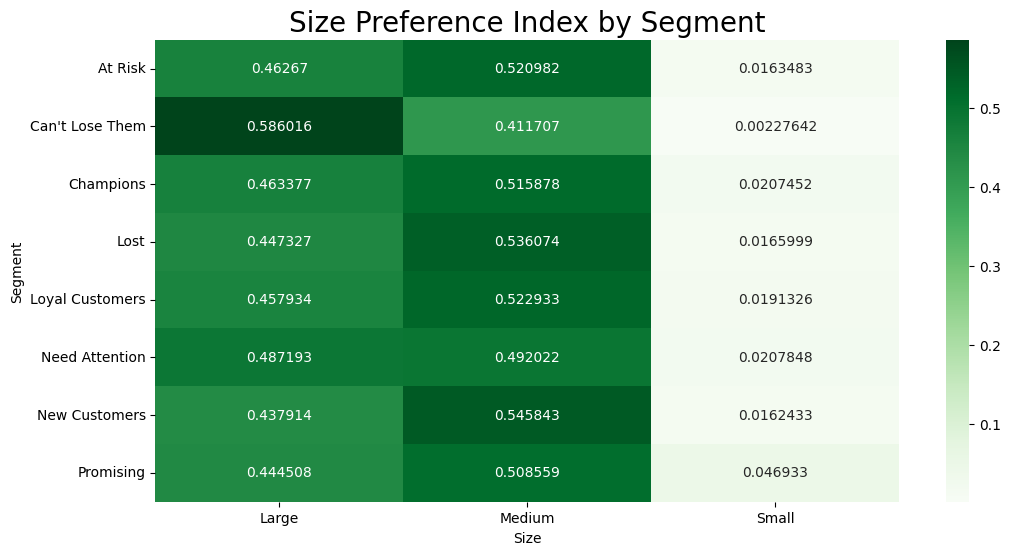

In [ ]:
size_quantity = size_quantity.pivot(index = 'Segment', columns = 'SIZE', values = 'Size_Percent').fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(size_quantity, annot = True, fmt = "g", cmap = "Greens")
plt.title('Size Preference Index by Segment', size = 20)
plt.xlabel('Size')
plt.ylabel('Segment')
plt.show()

Can't Lose Them segment shows an unusually strong preference for large packs (0.586), significantly higher than others.
→ This suggests they buy in bulk, possibly households with high consumption, making them ideal for bulk discount strategies.
→ However, their preference for small sizes is almost negligible (0.003), reinforcing their focus on volume over variety.

New Customers lean heavily towards medium pack sizes (0.546) over large (0.438) or small (0.016).
→ Indicates moderate commitment, possibly still experimenting — consider using medium pack promotional bundles to encourage brand trial.

Champions and Loyal Customers exhibit a balanced preference between large and medium sizes, suggesting flexibility.
→ They may respond well to customisable value packs or dual-size promotions.

Promising is the only segment with relatively noticeable interest in small sizes (0.047), though still minor.
→ This could indicate on-the-go usage or trial-based behaviour, possibly influenced by lifestyle (e.g., students or singles).

# Detailed Analysis

## 1. Product Performance & Portfolio Optimization
Core Question: Which products are driving our success and which are holding us back?
Areas to Investigate:
What does our product portfolio look like in terms of performance?
How concentrated is our revenue across products?
Which products should we prioritize for shelf space and promotion?
Are there products we should consider discontinuing?


### Top Products

In [ ]:
product_perf = data.groupby('PROD_NAME').agg({
    'TOT_SALES': 'sum',
    'LYLTY_CARD_NBR': 'nunique',
    'PROD_QTY': 'sum'
}).reset_index()
product_perf = product_perf.sort_values('TOT_SALES', ascending = False)
product_perf.head(10)

,PROD_NAME,TOT_SALES,LYLTY_CARD_NBR,PROD_QTY
11,Dorito Corn Chp Supreme 380g,39052.0,3111,6109
77,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6,3149,6164
70,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2,3106,6106
30,Kettle Mozzarella Basil & Pesto 175g,34457.4,3215,6381
69,Smiths Crinkle Original 330g,34302.6,3064,6018
6,Cheezels Cheese 330g,34296.9,3061,6017
12,Doritos Cheese Supreme 330g,33390.6,2991,5858
36,Kettle Sweet Chilli And Sour Cream 175g,33031.8,3103,6120
31,Kettle Original 175g,32740.2,3081,6064
32,Kettle Sea Salt And Vinegar 175g,32589.0,3084,6035


### Products for Optimisation

In [ ]:
product_perf['Cumulative_Sales_Pct'] = product_perf['TOT_SALES'].cumsum() / product_perf['TOT_SALES'].sum()
product_perf[product_perf['Cumulative_Sales_Pct'] <= 0.4]

,PROD_NAME,TOT_SALES,LYLTY_CARD_NBR,PROD_QTY,Cumulative_Sales_Pct
11,Dorito Corn Chp Supreme 380g,39052.0,3111,6109,0.022001
77,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6,3149,6164,0.042489
70,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2,3106,6106,0.062097
30,Kettle Mozzarella Basil & Pesto 175g,34457.4,3215,6381,0.081510
69,Smiths Crinkle Original 330g,34302.6,3064,6018,0.100835
6,Cheezels Cheese 330g,34296.9,3061,6017,0.120157
12,Doritos Cheese Supreme 330g,33390.6,2991,5858,0.138968
36,Kettle Sweet Chilli And Sour Cream 175g,33031.8,3103,6120,0.157577
31,Kettle Original 175g,32740.2,3081,6064,0.176022
32,Kettle Sea Salt And Vinegar 175g,32589.0,3084,6035,0.194382


In [ ]:
high_priority = product_perf[
    (product_perf['TOT_SALES'] > product_perf['TOT_SALES'].quantile(0.75)) &
    (product_perf['LYLTY_CARD_NBR'] > product_perf['LYLTY_CARD_NBR'].quantile(0.75))
]
high_priority['CSP'] = high_priority['TOT_SALES'].cumsum() / product_perf['TOT_SALES'].sum()
high_priority

/tmp/ipython-input-50-866706048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_priority['CSP'] = high_priority['TOT_SALES'].cumsum() / product_perf['TOT_SALES'].sum()


,PROD_NAME,TOT_SALES,LYLTY_CARD_NBR,PROD_QTY,Cumulative_Sales_Pct,CSP
11,Dorito Corn Chp Supreme 380g,39052.0,3111,6109,0.022001,0.022001
77,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6,3149,6164,0.042489,0.042489
70,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2,3106,6106,0.062097,0.062097
30,Kettle Mozzarella Basil & Pesto 175g,34457.4,3215,6381,0.081510,0.081510
36,Kettle Sweet Chilli And Sour Cream 175g,33031.8,3103,6120,0.157577,0.100119
32,Kettle Sea Salt And Vinegar 175g,32589.0,3084,6035,0.194382,0.118479
39,Kettle Tortilla ChpsHny&Jlpno Chili 150g,29021.4,3213,6309,0.246703,0.134829
34,Kettle Sensations Camembert & Fig 150g,28308.4,3138,6157,0.262652,0.150777
89,Tostitos Splash Of Lime 175g,27429.6,3164,6234,0.356071,0.166230
15,Doritos Corn Chips Cheese Supreme 170g,27183.2,3134,6180,0.386701,0.181544


### Size

In [ ]:
size_data = data.groupby('SIZE')['PROD_QTY'].sum().reset_index()
size_data['Percent'] = size_data['PROD_QTY'] / size_data['PROD_QTY'].sum()
size_data

,SIZE,PROD_QTY,Percent
0,Large,212651,0.460677
1,Medium,240407,0.520807
2,Small,8547,0.018516


In [ ]:
size = data.groupby('SIZE')['CLEAN_PROD_NAME'].nunique()
size

,CLEAN_PROD_NAME
SIZE,
Large,48
Medium,52
Small,3


### Flavours

In [ ]:
data['CLEAN_PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt', 'CCs Nacho Cheese',
       'Smiths Crinkle Cut  Chips Chicken',
       'Smiths Chip Thinly  S/Cream&Onion',
       'Kettle Tortilla ChpsHny&Jlpno Chili',
       'Smiths Crinkle Chips Salt & Vinegar',
       'Grain Waves         Sweet Chilli',
       'Doritos Corn Chip Mexican Jalapeno',
       'Grain Waves Sour    Cream&Chives',
       'Kettle Sensations   Siracha Lime', 'Twisties Cheese',
       'WW Crinkle Cut      Chicken', 'Thins Chips Light&  Tangy',
       'CCs Original', 'Burger Rings',
       'NCC Sour Cream &    Garden Chives',
       'Doritos Corn Chip Southern Chicken', 'Cheezels Cheese Box',
       'Smiths Crinkle      Original',
       'Infzns Crn Crnchers Tangy Gcamole',
       'Kettle Sea Salt     And Vinegar',
       'Smiths Chip Thinly  Cut Original', 'Kettle Original',
       'Red Rock Deli Thai  Chilli&Lime', 'Pringles Sthrn FriedChicken',
       'Pringles Sweet&Spcy BBQ', 'Thins Chips         Originl saltd',
       'Red R

In [ ]:
def classify_flavour(name):
    name = name.lower()

    if any(x in name for x in ['cheese', 'cheddar', 'cheezels', 'cheddr', 'nacho', 'supreme', 'puffs']):
        return 'Cheese'
    elif any(x in name for x in ['chicken', 'southern', 'roast chicken', 'friedchicken', 'chckn', 'bacon', 'pork', 'steak', 'snag', 'bolognese']):
        return 'Meat'
    elif any(x in name for x in ['bbq', 'barbecue', 'barbeque', 'chipotle', 'smoked', 'maple']):
        return 'BBQ'
    elif any(x in name for x in ['sour cream', 's/c', 'onion', 'chives', 'onin', 'sr/cream']):
        return 'Sour Cream / Onion'
    elif any(x in name for x in ['salt & vinegar', 'salt', 'vinegar', 'sea salt', 'slt']):
        return 'Salt & Vinegar'
    elif any(x in name for x in ['chilli', 'hot', 'spicy', 'jalapeno', 'siracha', 'pepper', 'chili', 'mexicana']):
        return 'Chilli / Spicy'
    elif any(x in name for x in ['original', 'plain', 'classic', 'french fries potato chips', 'orgnl']):
        return 'Original'
    elif any(x in name for x in ['sweet', 'honey', 'caramel', 'fig', 'mango']):
        return 'Sweet'
    elif any(x in name for x in ['pesto', 'basil', 'garlic', 'truffle', 'aioli', 'lime', 'rosemary', 'guacamole', 'gcamole', 'hrb']):
        return 'Herb / Gourmet'
    elif any(x in name for x in ['tangy', 'light & tangy', 'light&tangy']):
        return 'Sour / Tangy'
    elif any(x in name for x in ['btroot', 'beetroot', 'vegetable', 'veg', 'potato mix', 'ricotta']):
        return 'Vegetable'
    else:
        return 'Mixed / Other'

data['FLAVOUR'] = data['CLEAN_PROD_NAME'].apply(classify_flavour)

In [ ]:
df = data.groupby('FLAVOUR')['PROD_QTY'].sum().reset_index()
df['Percentage'] = df['PROD_QTY'] / df['PROD_QTY'].sum()
df

,FLAVOUR,PROD_QTY,Percentage
0,BBQ,26916,0.058310
1,Cheese,65018,0.140852
2,Chilli / Spicy,59820,0.129591
3,Herb / Gourmet,30336,0.065719
4,Meat,64154,0.138980
5,Mixed / Other,8899,0.019278
6,Original,49870,0.108036
7,Salt & Vinegar,73454,0.159127
8,Sour / Tangy,6095,0.013204
9,Sour Cream / Onion,56020,0.121359


In [ ]:
top_flavour = data.groupby(['PREMIUM_CUSTOMER', 'FLAVOUR'])['PROD_QTY'].sum().reset_index()

segment_sum = data.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().reset_index()
segment_sum.columns = ['PREMIUM_CUSTOMER', 'Total_PROD_QTY']

top_flavour = top_flavour.merge(segment_sum, on='PREMIUM_CUSTOMER')

top_flavour['Percentage'] = top_flavour['PROD_QTY'] / top_flavour['Total_PROD_QTY']

top_flavour = top_flavour.loc[top_flavour.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].idxmax()].reset_index(drop=True)
top_flavour

,PREMIUM_CUSTOMER,FLAVOUR,PROD_QTY,Total_PROD_QTY,Percentage
0,Budget,Salt & Vinegar,26100,162567,0.160549
1,Mainstream,Salt & Vinegar,28081,177431,0.158264
2,Premium,Salt & Vinegar,19273,121607,0.158486


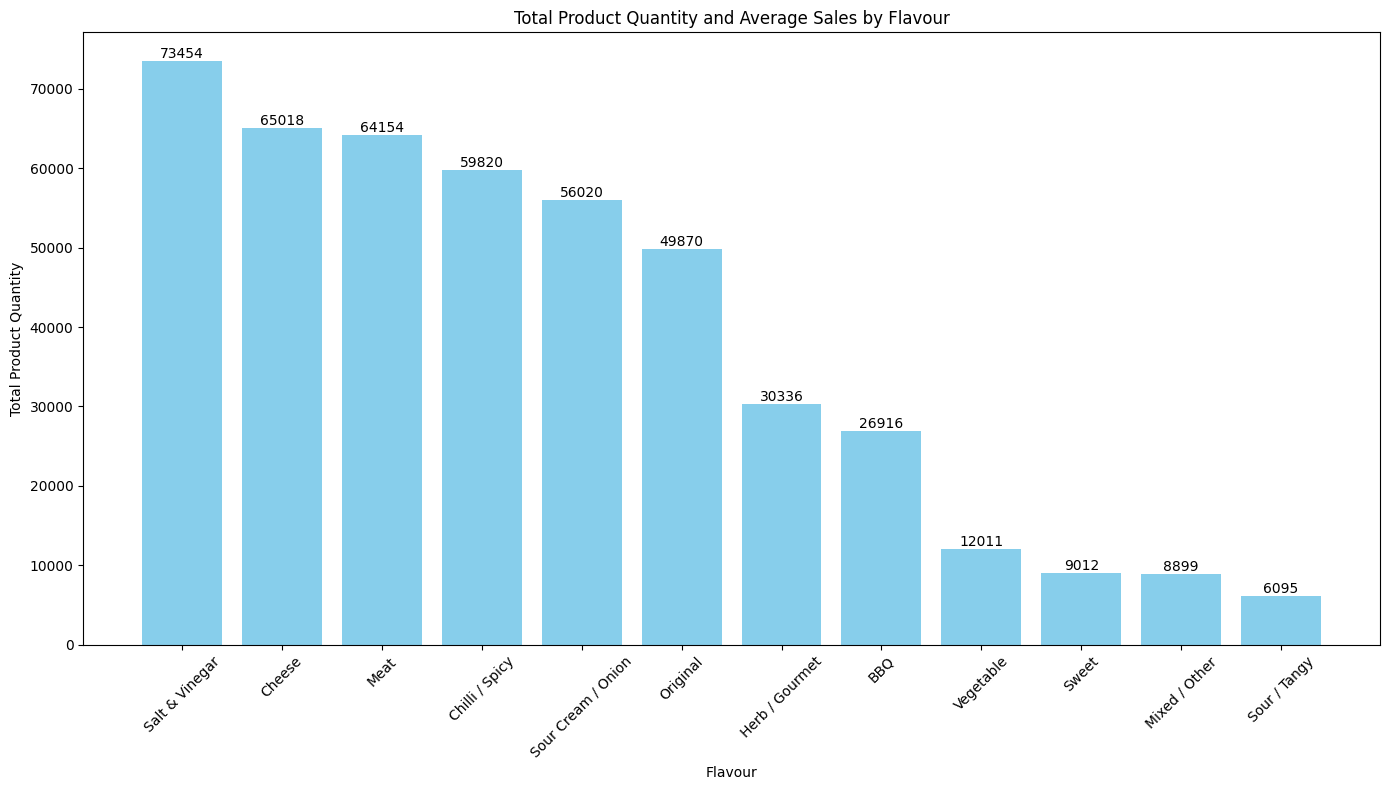

In [ ]:
flavour_summary = data.groupby('FLAVOUR').agg({
    'PROD_QTY': 'sum',
    'TOT_SALES': 'sum'  # Using mean as requested for the line chart
}).reset_index()

# Sort for better visualization (optional but good practice)
flavour_summary = flavour_summary.sort_values('PROD_QTY', ascending=False)

# Create the figure and a twin axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create the bar chart for PROD_QTY
bar_color = 'skyblue'
bars = ax1.bar(flavour_summary['FLAVOUR'], flavour_summary['PROD_QTY'], color=bar_color, label='Total Product Quantity')
ax1.set_xlabel('Flavour')
ax1.set_ylabel('Total Product Quantity')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=45) # Rotate x-labels

# Add quantity labels to the bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Title and legend
plt.title('Total Product Quantity and Average Sales by Flavour')
fig.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [ ]:
flavour_summary

,FLAVOUR,PROD_QTY,TOT_SALES
7,Salt & Vinegar,73454,281902.6
1,Cheese,65018,262660.4
4,Meat,64154,225226.9
2,Chilli / Spicy,59820,235923.8
9,Sour Cream / Onion,56020,200950.4
6,Original,49870,198330.8
3,Herb / Gourmet,30336,128633.1
0,BBQ,26916,106878.5
11,Vegetable,12011,50471.4
10,Sweet,9012,35160.4


##2. Sales Performance Over Time
Core Question: When and how are our products performing?
Areas to Investigate:
What temporal patterns exist in our sales data?
How do sales vary by day, week, month, or season?
Are there timing opportunities for promotions or inventory planning?


In [ ]:
data['DayOfWeek'] = data['DATE'].dt.day_name()
data['Month'] = data['DATE'].dt.month_name()
data['Week'] = data['DATE'].dt.isocalendar().week
data['Month_Year'] = data['DATE'].dt.to_period('M')

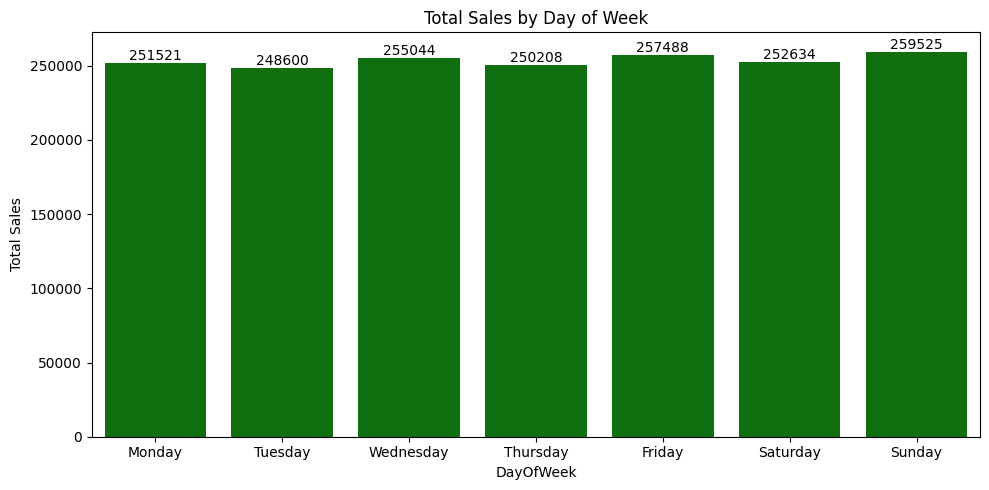

In [ ]:
sales_by_day = data.groupby('DayOfWeek')['TOT_SALES'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=sales_by_day.index, y=sales_by_day.values, color='green')
plt.title('Total Sales by Day of Week')
plt.ylabel('Total Sales')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

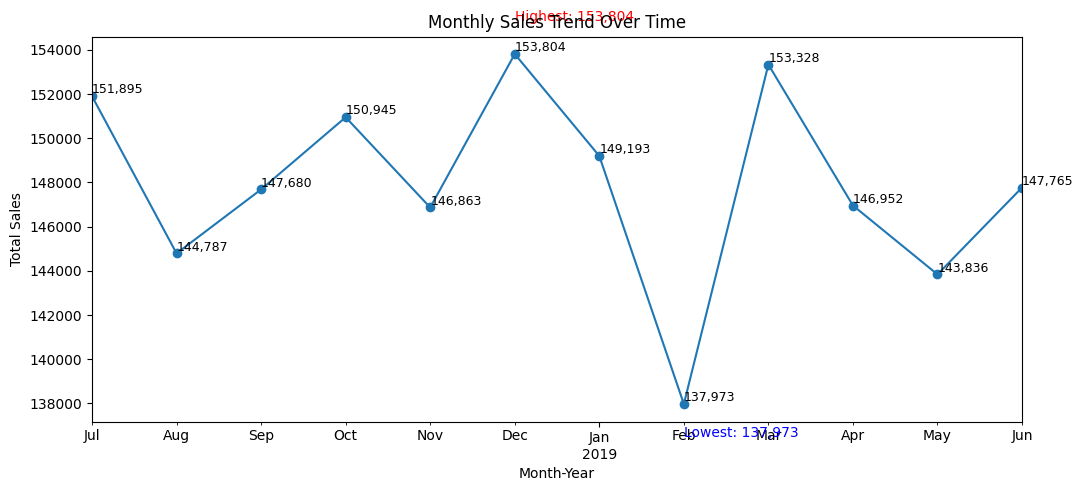

In [ ]:
monthly_trend = data.groupby('Month_Year')['TOT_SALES'].sum()

ax = monthly_trend.plot(figsize=(12, 5), marker='o', title='Monthly Sales Trend Over Time')

plt.ylabel('Total Sales')
plt.xlabel('Month-Year')

for x, y in zip(monthly_trend.index, monthly_trend.values):
    ax.text(x, y, f'{y:,.0f}', ha='left', va='bottom', fontsize=9)

highest_sales_month = monthly_trend.idxmax()
lowest_sales_month = monthly_trend.idxmin()
highest_sales_value = monthly_trend.max()
lowest_sales_value = monthly_trend.min()

ax.annotate(f'Highest: {highest_sales_value:,.0f}',
            xy=(highest_sales_month, highest_sales_value),
            xytext=(highest_sales_month, highest_sales_value + 1500),
            fontsize=10, color='red')

ax.annotate(f'Lowest: {lowest_sales_value:,.0f}',
            xy=(lowest_sales_month, lowest_sales_value),
            xytext=(lowest_sales_month, lowest_sales_value - 1500),
            fontsize=10, color='blue')

plt.show()

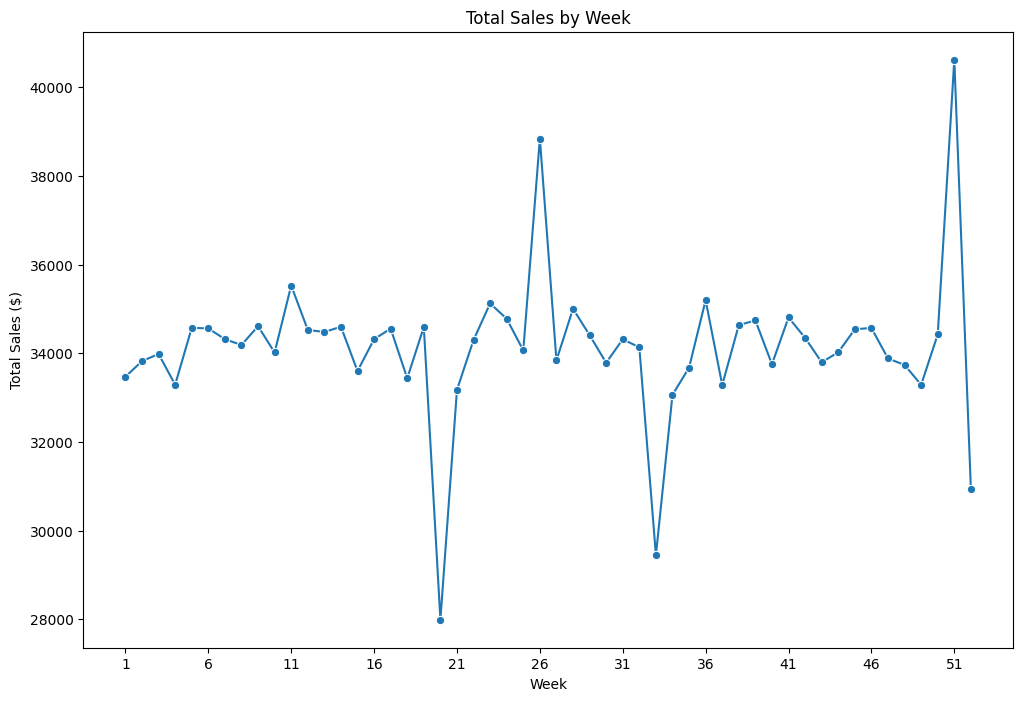

In [ ]:
weekly_trend = data.groupby('Week')['TOT_SALES'].sum()
plt.figure(figsize = (12,8))
ax = sns.lineplot(x = weekly_trend.index, y = weekly_trend.values, marker = 'o')
plt.title('Total Sales by Week')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
ax.set_xticks(range(1, 52, 5))
plt.show()

## 3. Customer Purchasing Patterns
Core Question: How do different customer types interact with our product range?
Areas to Investigate:
Do different customer segments (from your RFM analysis) prefer different products?
How do LIFESTAGE and PREMIUM_CUSTOMER status affect product choices?
What patterns exist in how customers build their chip purchases?


In [ ]:
# Grouping by LIFESTAGE, PREMIUM_CUSTOMER, and BRAND to get total product quantity
brand_pref = data.groupby(['LIFESTAGE', 'BRAND'])['PROD_QTY'].sum().reset_index()

# Pivoting the table for heatmap or analysis
brand_pivot = brand_pref.pivot_table(index=['LIFESTAGE'], columns='BRAND', values='PROD_QTY', fill_value=0)
brand_pivot

BRAND,Burger Rings,CCs,Cheetos,Cheezels,Cobs,Doritos,French Fries,Grain Waves,Infuzions,Kettle,Natural Chip Co.,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LIFESTAGE,,,,,,,,,,,,,,,,,,,,
MIDAGE SINGLES/COUPLES,287.0,818.0,489.0,846.0,1841.0,4633.0,218.0,1398.0,2108.0,7755.0,1308.0,4562.0,2746.0,5062.0,470.0,2506.0,1768.0,1775.0,1158.0,1933.0
NEW FAMILIES,70.0,168.0,106.0,237.0,542.0,1377.0,56.0,403.0,563.0,2191.0,282.0,1324.0,641.0,1274.0,104.0,705.0,520.0,444.0,354.0,487.0
OLDER FAMILIES,681.0,1824.0,1209.0,1593.0,3165.0,8206.0,544.0,2756.0,3803.0,13367.0,3067.0,8266.0,7011.0,11345.0,1206.0,4821.0,3011.0,3214.0,2120.0,5081.0
OLDER SINGLES/COUPLES,553.0,1612.0,1102.0,1816.0,3898.0,10264.0,522.0,3064.0,4407.0,17024.0,2774.0,10163.0,5783.0,10899.0,1111.0,5723.0,3920.0,3767.0,2574.0,4373.0
RETIREES,492.0,1397.0,920.0,1626.0,3602.0,9500.0,423.0,2776.0,3971.0,15568.0,2379.0,9432.0,5064.0,9675.0,1002.0,5306.0,3544.0,3584.0,2394.0,3606.0
YOUNG FAMILIES,574.0,1736.0,1069.0,1494.0,2932.0,7546.0,541.0,2365.0,3319.0,12153.0,2658.0,7435.0,6102.0,9946.0,1174.0,4218.0,2837.0,2746.0,1933.0,4301.0
YOUNG SINGLES/COUPLES,313.0,1054.0,635.0,1135.0,2591.0,6805.0,339.0,1964.0,2864.0,10993.0,1638.0,6837.0,3544.0,6671.0,625.0,3650.0,2534.0,2588.0,1765.0,2552.0


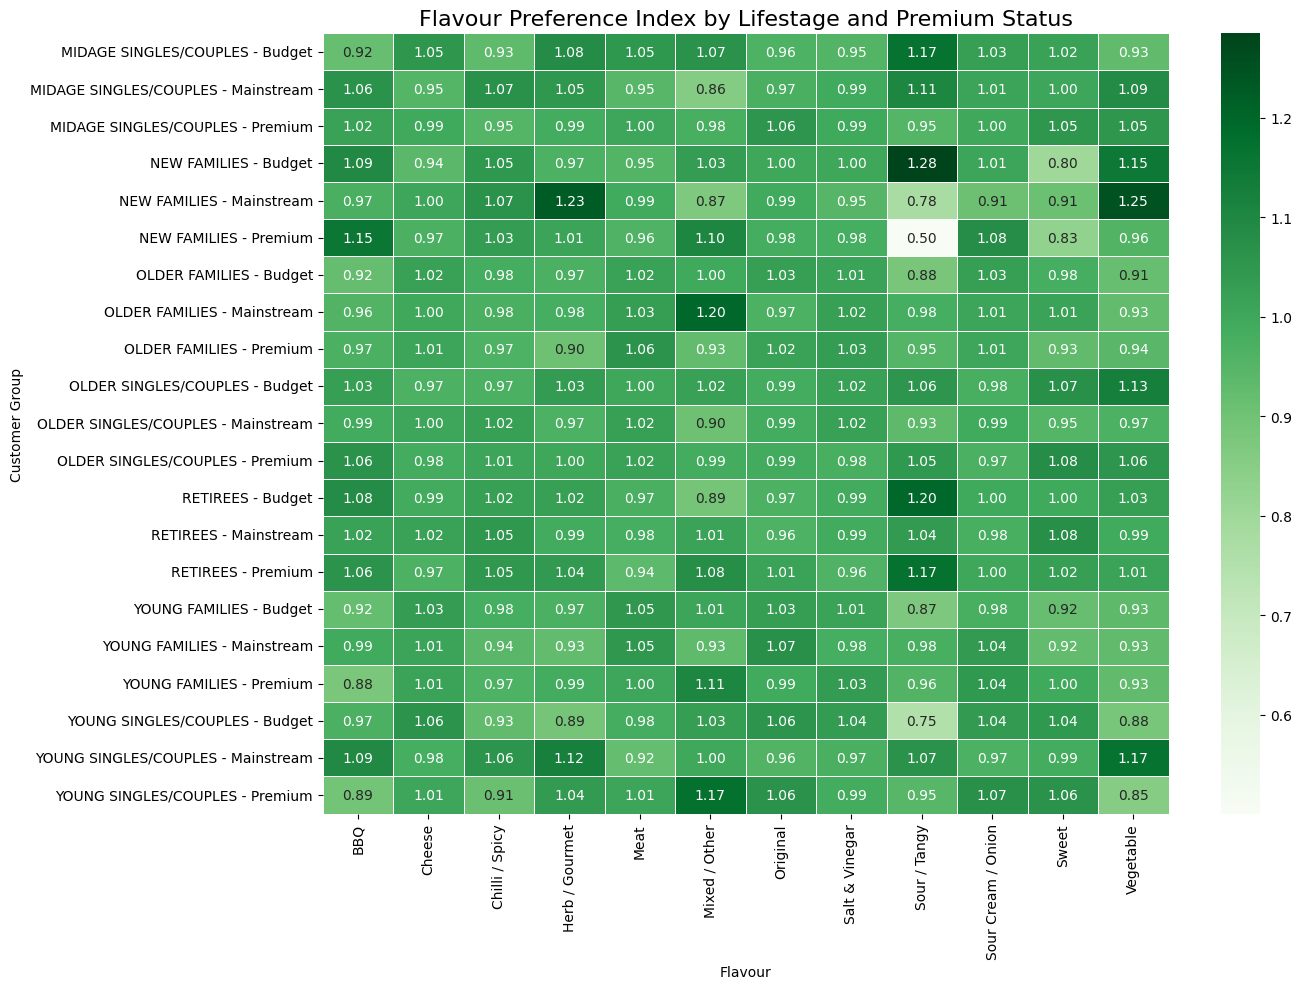

In [ ]:
# Your initial line
brand_pref = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'FLAVOUR'])['PROD_QTY'].sum().reset_index()

# Step 2: Create customer group column
brand_pref['Customer_Group'] = brand_pref['LIFESTAGE'] + ' - ' + brand_pref['PREMIUM_CUSTOMER']

# Step 3: Calculate total quantity per group
group_totals = brand_pref.groupby('Customer_Group')['PROD_QTY'].sum().reset_index()
group_totals.columns = ['Customer_Group', 'Total_QTY']

# Step 4: Merge to get percentage
brand_pref = brand_pref.merge(group_totals, on='Customer_Group')
brand_pref['Percent'] = brand_pref['PROD_QTY'] / brand_pref['Total_QTY']

# Step 5: Get overall flavour proportions
overall_flavour_share = data.groupby('FLAVOUR')['PROD_QTY'].sum() / data['PROD_QTY'].sum()

# Step 6: Calculate flavour index
brand_pref['Flavour_Index'] = brand_pref.apply(
    lambda row: row['Percent'] / overall_flavour_share[row['FLAVOUR']],
    axis=1
)

# Step 7: Pivot for heatmap
heatmap_data = brand_pref.pivot(index='Customer_Group', columns='FLAVOUR', values='Flavour_Index')

# Step 8: Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='Greens', annot=True, fmt=".2f", linewidths=.5)
plt.title('Flavour Preference Index by Lifestage and Premium Status', fontsize=16)
plt.ylabel('Customer Group')
plt.xlabel('Flavour')
plt.tight_layout()
plt.show()


In [ ]:
segment_summary

,Customers,Avg_Recency,Avg_Frequency,Total_Revenue,Avg_Revenue,Customer_%,Revenue_%
Segment,,,,,,,
Loyal Customers,16065,41.47,4.98,599895.25,37.34,22.9,35.0
Champions,7090,15.59,7.10,373948.95,52.74,10.1,21.8
At Risk,9491,135.36,4.60,337742.25,35.59,13.5,19.7
Lost,23031,206.97,1.35,205461.65,8.92,32.8,12.0
New Customers,9706,39.90,1.58,99768.85,10.28,13.8,5.8
Need Attention,2243,93.53,2.87,45256.25,20.18,3.2,2.6
Can't Lose Them,1222,166.66,2.49,28896.45,23.65,1.7,1.7
Promising,1369,37.13,3.18,22129.50,16.16,1.9,1.3


/tmp/ipython-input-67-501731748.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', len(sizes))


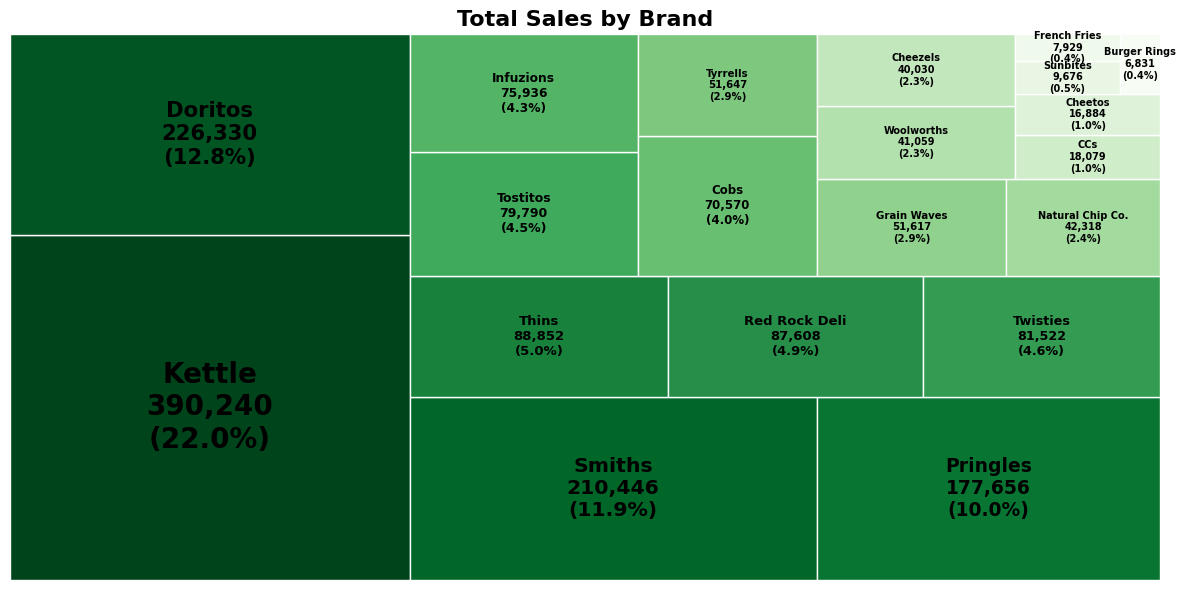

In [ ]:
import squarify
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

# Step 1: Aggregate and prepare data
df_brand = data.groupby('BRAND')['TOT_SALES'].sum().round(2).reset_index()
df_brand = df_brand.sort_values('TOT_SALES', ascending=False)

brand_sales_counts = df_brand.set_index('BRAND')['TOT_SALES'].to_dict()
total_sales = sum(brand_sales_counts.values())
labels = list(brand_sales_counts.keys())
sizes = list(brand_sales_counts.values())

# Step 2: Normalize sizes and get positions
norm_sizes = squarify.normalize_sizes(sizes, 100, 100)
rects = squarify.squarify(norm_sizes, 0, 0, 100, 100)

# Step 3: Generate colors
cmap = cm.get_cmap('Greens', len(sizes))
colors = [cmap(i) for i in range(cmap.N)][::-1]

# Step 4: Plot manually with variable font sizes
fig, ax = plt.subplots(figsize=(12, 6))

min_font_size = 7
max_font_size = 20
max_size = max(sizes)

for i, rect in enumerate(rects):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    size = sizes[i]

    # Compute font size based on area
    rel_size = size / max_size
    font_size = max(min_font_size, rel_size**0.5 * max_font_size)

    label = f"{labels[i]}\n{sizes[i]:,.0f}\n({sizes[i]/total_sales*100:.1f}%)"

    ax.add_patch(plt.Rectangle((x, y), dx, dy, facecolor=colors[i], edgecolor='white'))

    # Center text
    ax.text(x + dx/2, y + dy/2, label,
            ha='center', va='center',
            fontsize=font_size, weight='bold', color='black')

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.axis('off')
ax.set_title('Total Sales by Brand', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

#### Brand Ranking

In [ ]:
import pandas as pd

# Ensure DATE is datetime type
data['DATE'] = pd.to_datetime(data['DATE'])

# Step 1: Brand-level summary
brand_stats = data.groupby('BRAND').agg(
    Total_Volume=('PROD_QTY', 'sum'),
    Total_Revenue=('TOT_SALES', 'sum'),
    SKU_Count=('CLEAN_PROD_NAME', 'nunique')
).reset_index()

# Step 2: Revenue per SKU (efficiency)
brand_stats['Revenue_per_SKU'] = brand_stats['Total_Revenue'] / brand_stats['SKU_Count']

# Step 3: Revenue share (brand importance)
total_revenue = brand_stats['Total_Revenue'].sum()
brand_stats['Revenue_Share_%'] = 100 * brand_stats['Total_Revenue'] / total_revenue

# Step 5: Weighted performance score
brand_stats['Score'] = (
    0.4 * brand_stats['Total_Revenue'].rank(ascending=True) +
    0.3 * brand_stats['Revenue_per_SKU'].rank(ascending=True) +
    0.3 * brand_stats['Revenue_Share_%'].rank(ascending=True))

# Final ranking
brand_stats = brand_stats.sort_values('Score', ascending=False).reset_index(drop=True)
brand_stats

,BRAND,Total_Volume,Total_Revenue,SKU_Count,Revenue_per_SKU,Revenue_Share_%,Score
0,Kettle,79051,390239.8,13,30018.446154,21.985092,20.0
1,Doritos,48331,226329.9,8,28291.237500,12.750836,19.0
2,Pringles,48019,177655.5,8,22206.937500,10.008647,16.1
3,Smiths,54872,210446.0,16,13152.875000,11.855978,15.3
4,Twisties,18118,81522.1,3,27174.033333,4.592742,15.2
5,Thins,26929,88852.5,5,17770.500000,5.005718,14.5
6,Tostitos,18134,79789.6,3,26596.533333,4.495138,14.2
7,Red Rock Deli,30891,87607.5,11,7964.318182,4.935578,12.3
8,Cobs,18571,70569.8,3,23523.266667,3.975718,12.2
9,Infuzions,21035,75936.0,4,18984.000000,4.278036,12.0


In [ ]:
top_products_by_segment = data.groupby(['Segment', 'PROD_NAME'])['PROD_QTY'].sum().reset_index()
top_products_by_segment = top_products_by_segment.groupby('Segment').apply(lambda x: x.nlargest(5, 'PROD_QTY')).reset_index(drop=True)
top_products_by_segment[(top_products_by_segment['Segment'] == 'Champions') | (top_products_by_segment['Segment'] == 'Loyal Customers')]

/tmp/ipython-input-69-803240133.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_segment = top_products_by_segment.groupby('Segment').apply(lambda x: x.nlargest(5, 'PROD_QTY')).reset_index(drop=True)


,Segment,PROD_NAME,PROD_QTY
10,Champions,Smiths Crinkle Chips Salt & Vinegar 330g,1307
11,Champions,Kettle Mozzarella Basil & Pesto 175g,1296
12,Champions,Infuzions Thai SweetChili PotatoMix 110g,1295
13,Champions,Tyrrells Crisps Ched & Chives 165g,1281
14,Champions,Twisties Cheese 270g,1277
20,Loyal Customers,Cobs Popd Sea Salt Chips 110g,2198
21,Loyal Customers,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2154
22,Loyal Customers,Kettle 135g Swt Pot Sea Salt,2152
23,Loyal Customers,Tyrrells Crisps Ched & Chives 165g,2146
24,Loyal Customers,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2127


In [ ]:
rfm_data = rfm_data.reset_index()

data = data.merge(rfm_data[['LYLTY_CARD_NBR', 'Recency','Frequency',      'Monetary'      ,'Recency_score',  'Frequency_score', 'Monetary_score', 'RFM_Score']], on = 'LYLTY_CARD_NBR', how = 'left')

#### Loyal Customers and Champions

In [ ]:
loyal_champion = data[(data['Segment'] == 'Loyal Customers') | (data['Segment'] == 'Champions')]

In [ ]:
loyal_champion.groupby('Segment').agg({
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Recency': 'mean',
    'PROD_QTY': 'mean',
    'TOT_SALES': 'mean'
}).round(2)

,Frequency,Monetary,Recency,PROD_QTY,TOT_SALES
Segment,,,,,
Champions,7.42,54.41,15.53,1.98,7.43
Loyal Customers,5.54,40.89,43.40,1.96,7.50


In [ ]:
loyal_champion.groupby(['Segment', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique()

Segment          LIFESTAGE             
Champions        MIDAGE SINGLES/COUPLES     581
                 NEW FAMILIES                86
                 OLDER FAMILIES            1907
                 OLDER SINGLES/COUPLES     1323
                 RETIREES                   953
                 YOUNG FAMILIES            1703
                 YOUNG SINGLES/COUPLES      537
Loyal Customers  MIDAGE SINGLES/COUPLES    1652
                 NEW FAMILIES               488
                 OLDER FAMILIES            2288
                 OLDER SINGLES/COUPLES     3920
                 RETIREES                  3717
                 YOUNG FAMILIES            2187
                 YOUNG SINGLES/COUPLES     1813
Name: LYLTY_CARD_NBR, dtype: int64

In [ ]:
loyal_champion.groupby(['Segment', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

Segment          PREMIUM_CUSTOMER
Champions        Budget              2683
                 Mainstream          2564
                 Premium             1843
Loyal Customers  Budget              5509
                 Mainstream          6245
                 Premium             4311
Name: LYLTY_CARD_NBR, dtype: int64

In [ ]:
loyal_champion_size_counts = loyal_champion.groupby(['Segment', 'SIZE'])['PROD_QTY'].sum().reset_index()
loyal_champion_size_percentage = loyal_champion_size_counts.groupby('Segment')['PROD_QTY'].transform(lambda x: x / x.sum())
loyal_champion_size_counts['Percentage'] = loyal_champion_size_percentage
loyal_champion_size_counts

,Segment,SIZE,PROD_QTY,Percentage
0,Champions,Large,46125,0.463377
1,Champions,Medium,51351,0.515878
2,Champions,Small,2065,0.020745
3,Loyal Customers,Large,71876,0.457934
4,Loyal Customers,Medium,82078,0.522933
5,Loyal Customers,Small,3003,0.019133


In [ ]:
loyal = loyal_champion[loyal_champion['Segment'].isin(['Loyal Customers'])]
loyal_df = loyal.groupby(['Segment', 'FLAVOUR'])['PROD_QTY'].sum().reset_index()
loyal_df['Percentage'] = loyal_df['PROD_QTY'] / loyal_df['PROD_QTY'].sum()
loyal_df.sort_values('Percentage', ascending = False)

,Segment,FLAVOUR,PROD_QTY,Percentage
7,Loyal Customers,Salt & Vinegar,25151,0.160241
4,Loyal Customers,Meat,22057,0.140529
1,Loyal Customers,Cheese,21880,0.139401
2,Loyal Customers,Chilli / Spicy,20170,0.128507
9,Loyal Customers,Sour Cream / Onion,19227,0.122499
6,Loyal Customers,Original,16832,0.107240
3,Loyal Customers,Herb / Gourmet,10115,0.064444
0,Loyal Customers,BBQ,9173,0.058443
11,Loyal Customers,Vegetable,4210,0.026823
5,Loyal Customers,Mixed / Other,3041,0.019375


In [ ]:
champion = loyal_champion[loyal_champion['Segment'].isin(['Champions'])]
champion_df = champion.groupby(['Segment', 'FLAVOUR'])['PROD_QTY'].sum().reset_index()
champion_df['Percentage'] = champion_df['PROD_QTY'] / champion_df['PROD_QTY'].sum()

In [ ]:
loyal_champion_flavour = pd.concat([loyal_df, champion_df])

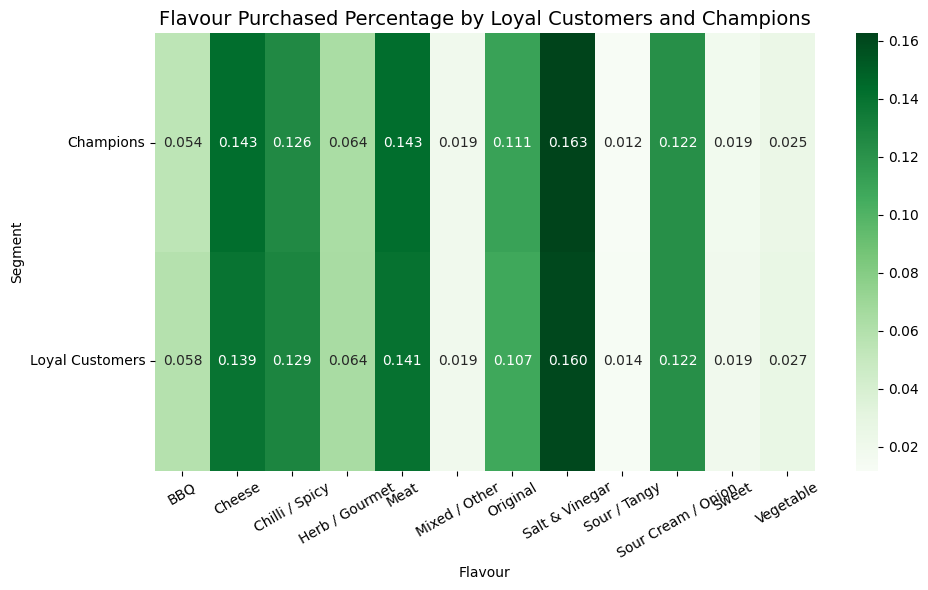

In [ ]:
loyal_champion_flavour_pivot = loyal_champion_flavour.pivot(index = 'Segment', columns = 'FLAVOUR', values = 'Percentage')

plt.figure(figsize=(10, 6))
sns.heatmap(loyal_champion_flavour_pivot, annot = True, fmt = ".3f", cmap = "Greens")
plt.title('Flavour Purchased Percentage by Loyal Customers and Champions', size = 14)
plt.xlabel('Flavour')
plt.ylabel('Segment')
plt.xticks(rotation = 30)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

#### New Customers and Promising

In [ ]:
new_promising = data[(data['Segment'] == 'New Customers') | (data['Segment'] == 'Promising')]

In [ ]:
new_promising.groupby('Segment').agg({
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Recency': 'mean',
    'PROD_QTY': 'mean',
    'TOT_SALES': 'mean'

}).round(2)

,Frequency,Monetary,Recency,PROD_QTY,TOT_SALES
Segment,,,,,
New Customers,1.79,11.53,39.71,1.69,6.50
Promising,3.23,16.23,36.94,1.61,5.08


In [ ]:
new_promising.groupby(['Segment', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique()

Segment        LIFESTAGE             
New Customers  MIDAGE SINGLES/COUPLES     985
               NEW FAMILIES               431
               OLDER FAMILIES            1021
               OLDER SINGLES/COUPLES     1710
               RETIREES                  1919
               YOUNG FAMILIES             953
               YOUNG SINGLES/COUPLES     2687
Promising      MIDAGE SINGLES/COUPLES     138
               NEW FAMILIES                64
               OLDER FAMILIES             144
               OLDER SINGLES/COUPLES      269
               RETIREES                   291
               YOUNG FAMILIES             140
               YOUNG SINGLES/COUPLES      323
Name: LYLTY_CARD_NBR, dtype: int64

In [ ]:
new_promising.groupby(['Segment', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

Segment        PREMIUM_CUSTOMER
New Customers  Budget              3163
               Mainstream          3984
               Premium             2559
Promising      Budget               475
               Mainstream           547
               Premium              347
Name: LYLTY_CARD_NBR, dtype: int64

In [ ]:
new_promising_size_counts = new_promising.groupby(['Segment', 'SIZE'])['PROD_QTY'].sum().reset_index()
new_promising_size_percentage = new_promising_size_counts.groupby('Segment')['PROD_QTY'].transform(lambda x: x / x.sum())
new_promising_size_counts['Percentage'] = new_promising_size_percentage
new_promising_size_counts

,Segment,SIZE,PROD_QTY,Percentage
0,New Customers,Large,11377,0.437914
1,New Customers,Medium,14181,0.545843
2,New Customers,Small,422,0.016243
3,Promising,Large,3116,0.444508
4,Promising,Medium,3565,0.508559
5,Promising,Small,329,0.046933


In [ ]:
new = new_promising[new_promising['Segment'].isin(['New Customers'])]
new_df = new.groupby(['Segment', 'FLAVOUR'])['PROD_QTY'].sum().reset_index()
new_df['Percentage'] = new_df['PROD_QTY'] / new_df['PROD_QTY'].sum()
new_df.sort_values('Percentage', ascending = False)

promising = new_promising[new_promising['Segment'].isin(['Promising'])]
promising_df = promising.groupby(['Segment', 'FLAVOUR'])['PROD_QTY'].sum().reset_index()
promising_df['Percentage'] = promising_df['PROD_QTY'] / promising_df['PROD_QTY'].sum()

new_promising_flavour = pd.concat([new_df, promising_df])

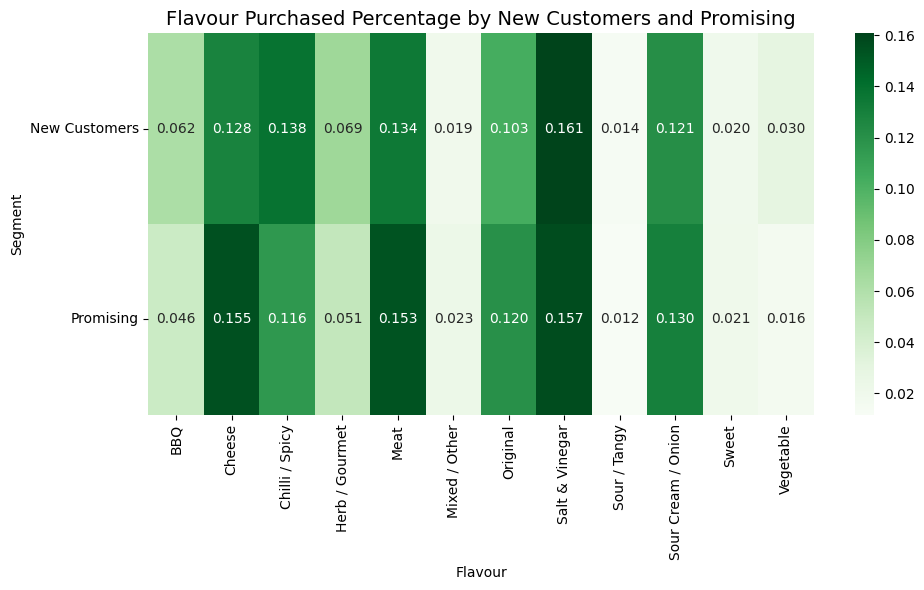

In [ ]:
new_promising_flavour_pivot = new_promising_flavour.pivot(index = 'Segment', columns = 'FLAVOUR', values = 'Percentage')

plt.figure(figsize=(10, 6))
sns.heatmap(new_promising_flavour_pivot, annot = True, fmt = ".3f", cmap = "Greens")
plt.title('Flavour Purchased Percentage by New Customers and Promising', size = 14)
plt.xlabel('Flavour')
plt.ylabel('Segment')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [ ]:
top_products_by_segment = data.groupby(['Segment', 'PROD_NAME'])['PROD_QTY'].sum().reset_index()
top_products_by_segment = top_products_by_segment.groupby('Segment').apply(lambda x: x.nlargest(5, 'PROD_QTY')).reset_index(drop=True)
top_products_by_segment[(top_products_by_segment['Segment'] == 'New Customers') | (top_products_by_segment['Segment'] == 'Promising')]

/tmp/ipython-input-87-3116154483.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_segment = top_products_by_segment.groupby('Segment').apply(lambda x: x.nlargest(5, 'PROD_QTY')).reset_index(drop=True)


,Segment,PROD_NAME,PROD_QTY
30,New Customers,Doritos Corn Chip Mexican Jalapeno 150g,445
31,New Customers,Pringles Original Crisps 134g,424
32,New Customers,Pringles SourCream Onion 134g,418
33,New Customers,Infuzions SourCream&Herbs Veg Strws 110g,414
34,New Customers,Infuzions Thai SweetChili PotatoMix 110g,414
35,Promising,Cheezels Cheese Box 125g,130
36,Promising,CCs Nacho Cheese 175g,121
37,Promising,CCs Tasty Cheese 175g,121
38,Promising,WW Original Corn Chips 200g,116
39,Promising,Sunbites Whlegrn Crisps Frch/Onin 90g,112


#### At Risk and Need Attention

In [ ]:
risk_attention = data[(data['Segment'] == 'At Risk') | (data['Segment'] == 'Need Attention')]

In [ ]:
risk_attention.groupby('Segment').agg({
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Recency': 'mean',
    'PROD_QTY': 'mean',
    'TOT_SALES': 'mean'

}).round(2)

,Frequency,Monetary,Recency,PROD_QTY,TOT_SALES
Segment,,,,,
At Risk,5.10,38.8,131.27,1.97,7.73
Need Attention,2.95,20.0,97.96,1.80,7.04


In [ ]:
risk_attention.groupby(['Segment', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique()

Segment         LIFESTAGE             
At Risk         MIDAGE SINGLES/COUPLES     990
                NEW FAMILIES               279
                OLDER FAMILIES            1278
                OLDER SINGLES/COUPLES     2383
                RETIREES                  2230
                YOUNG FAMILIES            1073
                YOUNG SINGLES/COUPLES     1258
Need Attention  MIDAGE SINGLES/COUPLES     244
                NEW FAMILIES                86
                OLDER FAMILIES             232
                OLDER SINGLES/COUPLES      439
                RETIREES                   486
                YOUNG FAMILIES             211
                YOUNG SINGLES/COUPLES      545
Name: LYLTY_CARD_NBR, dtype: int64

In [ ]:
risk_attention.groupby(['Segment', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

Segment         PREMIUM_CUSTOMER
At Risk         Budget              3159
                Mainstream          3807
                Premium             2525
Need Attention  Budget               676
                Mainstream           965
                Premium              602
Name: LYLTY_CARD_NBR, dtype: int64

In [ ]:
data.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique()

,LYLTY_CARD_NBR
LIFESTAGE,
MIDAGE SINGLES/COUPLES,7109
NEW FAMILIES,2481
OLDER FAMILIES,9586
OLDER SINGLES/COUPLES,14318
RETIREES,14484
YOUNG FAMILIES,9002
YOUNG SINGLES/COUPLES,13945


In [ ]:
risk_attention_size_counts = risk_attention.groupby(['Segment', 'SIZE'])['PROD_QTY'].sum().reset_index()
risk_attention_size_percentage = risk_attention_size_counts.groupby('Segment')['PROD_QTY'].transform(lambda x: x / x.sum())
risk_attention_size_counts['Percentage'] = risk_attention_size_percentage
risk_attention_size_counts

,Segment,SIZE,PROD_QTY,Percentage
0,At Risk,Large,39791,0.462670
1,At Risk,Medium,44806,0.520982
2,At Risk,Small,1406,0.016348
3,Need Attention,Large,5649,0.487193
4,Need Attention,Medium,5705,0.492022
5,Need Attention,Small,241,0.020785


In [ ]:
risk = risk_attention[risk_attention['Segment'].isin(['At Risk'])]
risk_df = risk.groupby(['Segment', 'FLAVOUR'])['PROD_QTY'].sum().reset_index()
risk_df['Percentage'] = risk_df['PROD_QTY'] / risk_df['PROD_QTY'].sum()
risk_df.sort_values('Percentage', ascending = False)

attention = risk_attention[risk_attention['Segment'].isin(['Need Attention'])]
attention_df = attention.groupby(['Segment', 'FLAVOUR'])['PROD_QTY'].sum().reset_index()
attention_df['Percentage'] = attention_df['PROD_QTY'] / attention_df['PROD_QTY'].sum()

risk_attention_flavour = pd.concat([risk_df, attention_df])

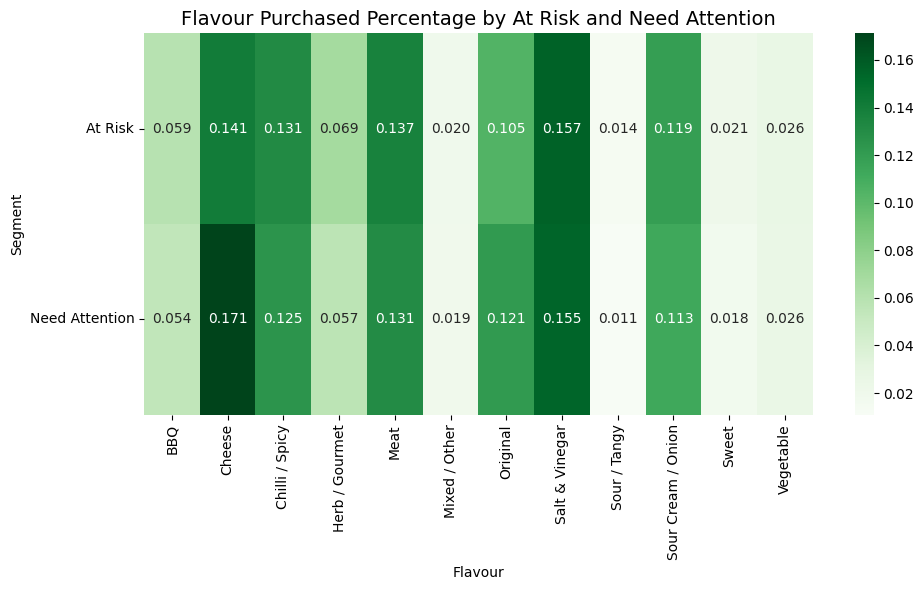

In [ ]:
risk_attention_flavour_pivot = risk_attention_flavour.pivot(index = 'Segment', columns = 'FLAVOUR', values = 'Percentage')

plt.figure(figsize=(10, 6))
sns.heatmap(risk_attention_flavour_pivot, annot = True, fmt = ".3f", cmap = "Greens")
plt.title('Flavour Purchased Percentage by At Risk and Need Attention', size = 14)
plt.xlabel('Flavour')
plt.ylabel('Segment')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

In [ ]:
top_products_by_segment = data.groupby(['Segment', 'PROD_NAME'])['PROD_QTY'].sum().reset_index()
top_products_by_segment = top_products_by_segment.groupby('Segment').apply(lambda x: x.nlargest(5, 'PROD_QTY')).reset_index(drop=True)
top_products_by_segment[(top_products_by_segment['Segment'] == 'At Risk') | (top_products_by_segment['Segment'] == 'Need Attention')]

/tmp/ipython-input-98-28542397.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_segment = top_products_by_segment.groupby('Segment').apply(lambda x: x.nlargest(5, 'PROD_QTY')).reset_index(drop=True)


,Segment,PROD_NAME,PROD_QTY
0,At Risk,Kettle Mozzarella Basil & Pesto 175g,1360
1,At Risk,Kettle Sensations Camembert & Fig 150g,1339
2,At Risk,Dorito Corn Chp Supreme 380g,1289
3,At Risk,Cobs Popd Sea Salt Chips 110g,1283
4,At Risk,Doritos Corn Chips Cheese Supreme 170g,1278
25,Need Attention,Dorito Corn Chp Supreme 380g,279
26,Need Attention,Cheezels Cheese 330g,245
27,Need Attention,Doritos Cheese Supreme 330g,214
28,Need Attention,Smiths Crinkle Original 330g,206
29,Need Attention,Smiths Crnkle Chip Orgnl Big Bag 380g,203
